
<h1 style="font-family: 'Georgia'; font-size: 42px;">
    Fundamental Issues in Insurance Claim Prediction – A Classical Imbalance Problem
</h1>


In [39]:
from IPython.core.display import HTML

# Define custom styles for the notebook
HTML('''
<style>
    p {
        font-family: 'Arial' ,sans-serif;
        font-size: 18px;
        line-height: 1.5;
    }
    h1 {
        font-family: 'Arial';
        font-size: 24px;
    }
</style>
''')

# Author's Note
<p style="font-family: 'Arial'; font-size: 18px; line-height: 1.5;">
This article is designed for both students and anyone interested in understanding practical data science methods. <b>If you're short on time, jump to the Results (3-minute read) for a concise overview of the best-performing models and insights. </b>

The author acknowledges the following:
* This is an exploratory model.
* The limitations of the data (e.g., lack of historical or behavioral data).
* Real-world claim prediction involves richer datasets and more sophisticated method (historical driving behavior, claim history, accident rates, etc.)

The goal of this report is to showcase the current weaknesses and trade-offs of using machine learning for insurance claim prediction in an accessible and straightforward way. For those interested in more advanced, high-accuracy methods, please feel free to explore the <b>"Reading Reference"</b> section, which includes literature discussing more recent and intricate methodologies.

For those diving deeper, I hope this article provides valuable insights to support your learning journey. Thank you for your interest, and I welcome any feedback, suggestions, or ideas for improvement. Feel free to reach out at maverick.article@gmail.com.
</p>

# Overview (3-minute read)

<p style="font-family: 'Arial', sans-serif; font-size: 18px; line-height: 1.5;">
     In recent years, the insurance industry has been making a significant shift toward artificial intelligence (AI). Faced with increasing data availability and rising competition, companies are eager to leverage AI’s ability to analyze vast datasets to uncover patterns that human analysts might miss and for efficiency.
    
However, transitioning to AI-driven systems is not without its challenges. Take claim prediction, for example—a task that seems straightforward on the surface but quickly becomes a data scientist’s nightmare. In the world of insurance, claims are rarely made, and for many policyholders, they may never be made at all. The chances of a claim occurring are near zero. This fundamental challenge of insurance claims makes it difficult for insurance companies to create an algorithm to predict the likelihood of an individual to make a claim or not.
    <br></br>
    This scenario suffers from what is known as classification imbalance (CI), where there is not enough information in certain classes for machine learning algorithms to effectively predict outcomes. Where there is insufficient data in certain classes, the algorithm's performance would suffer. To give an example, assuming the actual insurance claims are only 2% of all premiums, we could have just written down this code:
</p>


```{python}
claims="no insurance claims"
claims
```

<p style="font-family: 'Arial', sans-serif; font-size: 18px; line-height: 1.7;">
And just like that, we would achieve a  data scientist's dream- a model boasting 98% accuracy. A very impressive result, right? I would have receive call from all insurance company CEO, each eager to bring that "magic" into their company. 

But here’s the reality check: while this model might look great on paper, it’s practically useless. High accuracy masks deeper issues, such as failing to identify the rare but critical instances of actual claims. In reality, this approach sacrifices insight for metrics, creating headaches for implementation teams and leaving insurers no closer to meaningful predictions.
 
Recent events have shown how these flaws can have significant consequences. UnitedHealthcare, one of the largest healthcare insurers in the U.S., has come under scrutiny for its use of an AI-based system which reportedly denied 33% of claims—even after appeals. [See this news article for details](https://www.npr.org/2024/12/10/nx-s1-5223471/theres-anger-behind-the-internets-reactions-to-the-death-of-unitedhealthcare-ceo). This controversy highlights the risks of relying on AI in high-stakes scenarios, where fairness, bias, and ethical considerations are just as important as the numbers. 

In this article, I’ll dive into the challenges of predicting insurance claims and how adjusting thresholds can strike a balance between catching actual claims and avoiding false alarms—but can also lead to mistakes if not carefully managed. Using this as a case study, we’ll explore the strengths and pitfalls of applying machine learning to imbalanced datasets, keeping the discussion straightforward and practical.

</p>

# Reading Reference (Algorithm and AI in healthcare article)

* [IAG on creating ethical artificial](https://www.industry.gov.au/news/australian-ai-ethics-principles-insurance-australia-group-reviews-its-ai-claim-decisions)
* [A survey on single and multiecnomics data mining methods in cancer data classification](https://www.sciencedirect.com/science/article/pii/S1532046420300939)
* [A comprehensive review of object detection with deep learning](https://www.sciencedirect.com/science/article/pii/S1051200422004298) 
* [Learning From Imbalance Data](https://www.researchgate.net/publication/224541268_Learning_from_Imbalanced_Data) 
* [Classification with class imbalance problem: A review](https://www.researchgate.net/publication/288228469_Classification_with_class_imbalance_problem_A_review)
* [Frank Harrell: Classification vs. Prediction](https://www.fharrell.com/post/classification/)
* [PRO-SMOTEBoost: An adaptive SMOTEBoost probabilistic algorithm for rebalancing and improving imbalanced data classification](https://www.sciencedirect.com/science/article/pii/S0020025524014622#:~:text=SMOTEBoost%20rebalances%20many%20highly%20and,changing%20the%20update%20weights%20and)
* [Improving k Nearest Neighbor with Exemplar Generalization for Imbalanced Classification](https://link.springer.com/chapter/10.1007/978-3-642-20847-8_27). 

# Dataset (1-minute read)

The dataset for car insurance model is collected from [statso.io](https://statso.io/car-insurance-modelling-case-study/) . Below is the feature and the description of the feature:

| Feature                                                                                       | Description                                                                                                                                                                      |
|-----------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| policy_id                                                                                     | Unique identifier for the insurance policy.                                                                                                                                      |
| subscription_length                                                                           | The duration for which the insurance policy is active.                                                                                                                           |
| customer_age                                                                                  | Age of the insurance policyholder, which can influence the likelihood of claims.                                                                                                 |
| vehicle_age                                                                                   | Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.                                                                        |
| segment | Segment of the vehicle| 
|transmission_type | Type of transmission |
|steering_type | Type of steering mechanism |
|ncap_rating | NCAP safety rating of the vehicle |
| model                                                                                         | The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.                                                                          |
| fuel_type                                                                                     | Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.                                                          |
| max_torque, max_power                                                                         | Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.                                                                      |
| engine_type                                                                                   | The type of engine, which might have implications for maintenance and claim rates.                                                                                               |
| displacement, cylinder                                                                        | Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.                                               |
| region_code                                                                                   | The code representing the geographical region of the policyholder, as claim patterns can vary regionally.                                                                        |
| region_density                                                                                | Population density of the policyholder’s region, which could correlate with accident and claim frequencies.                                                                      |
| airbags                                                                                       | The number of airbags in the vehicle, indicating safety level which can influence claim probability.                                                                             |
| is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System) | Features that enhance vehicle safety and could potentially reduce the likelihood of claims.                                                                  |
| is_parking_sensors, is_parking_camera                                                         | Parking aids that might affect the probability of making a claim, especially in urban areas.                                                                                     |
| rear_brakes_type                                                                              | Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.                                                                                     |
| Various binary indicators (Yes/No) for specific vehicle amenities and safety features         | Features like steering_type, turning_radius, length, width, gross_weight, etc., which together build a profile of the vehicle’s characteristics and its associated risk factors. |
| claim_status   | Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.|

In [50]:
import pandas as pd

file_path = 'DATA SCIENCE/Insurance claims data.csv'
data = pd.read_csv(file_path)
data.head()


,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

## Data Information:

1.The dataset contains 58,592 entries with 41 columns

2.There is a mix of binary, numerical, and categorical variable

3.The claim_status is the target variable, which is the variable we want to be able to predict whether the claim was made (1) or not made (0).

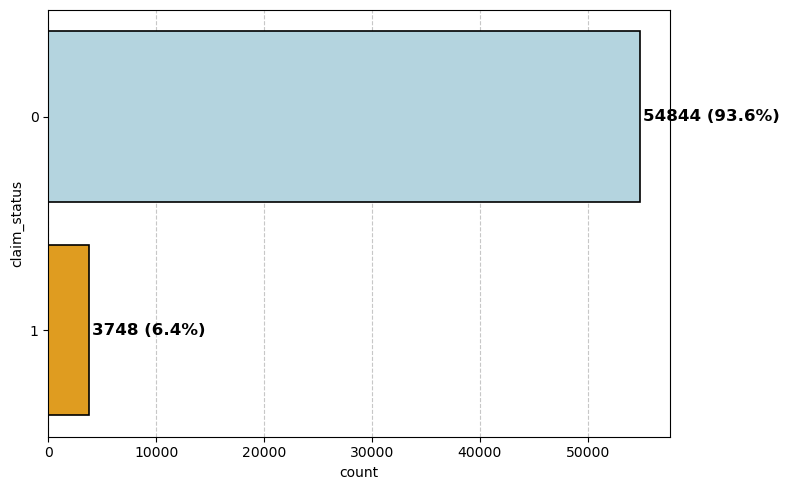

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

ax = sns.countplot(y='claim_status', data=data, hue='claim_status', palette=['lightblue', 'orange'], legend=False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True) 
total = len(data)
for bar in ax.patches:
    count = bar.get_width()
    percentage = 100 * count / total
    ax.text(count + (total * 0.005), bar.get_y() + bar.get_height() / 2, 
            f'{int(count)} ({percentage:.1f}%)', 
            va='center', fontsize=12, color='black', weight='bold')  # Dark text for visibility

for bar in ax.patches:
    bar.set_edgecolor('black') 
    bar.set_linewidth(1.2)

plt.tight_layout()
plt.show()


# Method (15-minute read)

Most machine learning algorithms assume balanced data. In an imbalanced dataset, they tend to favor the majority class, leading to:
- **High overall accuracy but poor performance on the minority class**

- **Missed opportunities to flag rare but critical instances like claims**

To address these challenges, we use two broad approaches: data-level techniques and algorithm-level techniques.

## **Data-Level Approach**

### A. SMOTE (Synthetic Minority Over-sampling Technique)

According to this [paper](https://www.researchgate.net/publication/288228469_Classification_with_class_imbalance_problem_A_review), SMOTE offers advantages over basic sampling techniques (like over-sampling and down-sampling):

- **Increased Diversity**: SMOTE balances the class distribution while adding variety to the training data, leading to better generalization of the model.

- **Preventing Overfitting**: Unlike random oversampling, which duplicates examples, SMOTE generates synthetic, slightly different variations of the minority class. This reduces the risk of overfitting and ensures the model doesn't memorize specific instances.
<br></br>
However, because SMOTE generates synthetic data that might not perfectly reflect real-world variations, it’s important to use it with caution. While it can be effective, SMOTE’s generated samples may sometimes introduce data points that don’t fully capture the <b>true</b> characteristics of the minority class -— essentially creating “virtual” data that lacks the depth of true minority instances. However, for the sake of this report I would try to incorporate SMOTE

<p align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*CeOd_Wbn7O6kpjSTKTIUog.png" alt="SMOTE Example" style="width:50%; display: block; margin: 0 auto;">
</p>

### B. Combining Downsampling and Upweighting

According to [Google's Datasets: Imbalanced Datasets](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets), an effective method is to downsample the majority class and then upweight these downwsampled examples in that downsampled majority class. This process ensures:

- **Balancing Influence**: Even though fewer examples from the majority class are used, they carry more weight during training, maintaining the overall balance between classes.

- **Reduced Bias**: Upweighting the majority class after downsampling helps reduce prediction bias. This ensures the model's predictions reflect the true distribution of the dataset, avoiding an overemphasis on the minority class.

<p align="center">
    <img src="https://developers.google.com/static/machine-learning/data-prep/images/downsampling-upweighting-v5.svg" alt="Downsampling Upweighting" style="width:50%; display: block; margin: 0 auto;">
</p>

### C. Feature Selection
Feature Selection is a method that involves identifying and retaining only the most relevant features for model training. This process reduces the dataset’s dimensionality, which can improve model performance, interpretability, and training efficiency. In the context of class imbalance, feature selection helps by focusing the model on features that provide the most effect for the minority class.

<p align="center">
    <img src="feature_selection.png" alt="Downsampling Upweighting" style="width:50%; display: block; margin: 0 auto;">
</p>

## **Algorithm-Level Approach**
With the dataset adjusted, we can now train models capable of handling class imbalance and making predictions. These models use class weights and other parameters to prioritize rare events.
### A. Standard Algorithm
#### 1. Logistic Regression with Class Weights
Logistic Regression is a classic, interpretable algorithm that remains effective even with class imbalance by applying class weights. By assigning a higher weight to the minority class, we can ensure it doesn’t get lost in the majority.

```{python}
PYTHON code
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
```

#### 2. Random Forest with Class Weights
An ensemble of decision trees that prioritizes minority class samples when class weights are adjusted

```{python}
PYTHON Code
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
```

#### 3. Gradient Boosting with scale_pos_weight (XGBoost)
XGBoost assigns higher importance to the minority class with the scale_pos_weight parameter, making it a go-to for imbalanced datasets.

```{python}
PYTHON Code
from xgboost import XGBClassifier

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)
xgb.fit(X_train, y_train)
```

#### 4. CatBoost with Class Weights
CatBoost’s class weighting makes it effective on imbalanced data, especially with categorical features, and is often faster than other boosting methods.

```{python}
PYTHON CODE
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(class_weights=[1, 10], random_state=42, verbose=0)  # Adjust weights as needed
catboost.fit(X_train, y_train)
```

## The Role of Thresholds in Decision-Making
Once the models are trained, they don’t just output “claim” or “no claim.” Instead, they provide a probability score for each prediction. This is where thresholds come into play. Threshold is a decision boundary score ranging from 0.0 to 1.0. If the model: 
- predicts a probability above the threshold (e.g. 50%): Flag as **Claim**

- predicts a probability below the threshold: Flag as **No Claim**

So by adjusting this threshold, we can drastically affect the model’s performance. If we lower the threshold we can capture more **Claim** (high recall) but with more false positives (low precision). Or if we increase the threshold we reduce false positive (high precision) but miss a genuine claim (low recall). 

This trade-off highlights the risks of improper calibration, as seen in the recent controversy surrounding UnitedHealthcare. Their AI system faced backlash for allegedly denying 33% of claims, with reports suggesting a 90% error rate. 

## **Performance Measure**
To evaluate the effectiveness of these methods, we use the following metrics:

- **Precision**: Indicates the accuracy of positive predictions.
- **Recall**: Measures the model’s ability to identify positive instances.
- **F1-Score**: Provides a balance between precision and recall. We will use this parameter for fine-tune the results.
- **AUC-ROC**: Evaluates the model's ability to distinguish between classes without setting a fixed threshold.

In this study, we prioritize **F1-Score** to balance precision and recall when fine-tuning thresholds. However, other metrics also play a role in understanding the full performance spectrum.

# Work Step (2-minute read)

## Step 1: Address Class Imbalance with Data-Level Techniques
The first step is to address class imbalance. Feature Selection is chosen to identify the most relevant predictors. Downsampling-Upweighting to balance the dataset while retaining the significance of the majority class. Additionally, SMOTE will be tested to evaluate if synthetic data can improve performance.

Each of these methods creates a separate dataset. These datasets will then be evaluated using Logistic Regression, to establish a baseline. This allows us to assess the impact of each data-level technique before proceeding to more complex algorithms.

## Step 2: Algorithm-Level Approach
Once the dataset is prepared, the analysis proceeds with more complex algorithms to leverage their advanced capabilities in handling imbalanced data. I will use:

- **Random Forest with Class Weights**
- **GradientBoosting (XGBoost, LightGBM, CatBoost)**
- **Stacked Ensemble**  
  Combines the strengths of base models using XGBoost as the meta-model to capture complex interactions and refine predictions further.

## Step 3: Performance Measure
To measure the performance for each method, the evaluation will be performed using precision, recall, F1-Score, and AUC-ROC scoring

# Data Processing (4-minute read)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#categorical variable -> numerical
data_copy = data.drop(columns='policy_id')
for column in data_copy.select_dtypes(include=['object']).columns:
    data_copy[column] = data_copy[column].astype('category').cat.codes

# Check for multicollinearity
parameter = data.select_dtypes(include=['float64', 'int64', 'int8']).drop(columns=['claim_status'], errors='ignore')  # Replace 'target' with your actual target column name
C = parameter.assign(constant=1) #add_constant number

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = parameter.columns
vif['VIF'] = [variance_inflation_factor(C.values, i) for i in range(len(parameter.columns))]

print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
                Feature         VIF
0   subscription_length    1.096785
1           vehicle_age    1.268972
2          customer_age    1.035697
3        region_density    1.018128
4               airbags   59.093994
5          displacement  484.932490
6              cylinder  120.219296
7        turning_radius   49.085512
8                length  211.888044
9                 width   78.916190
10         gross_weight    5.434650
11          ncap_rating  169.535662


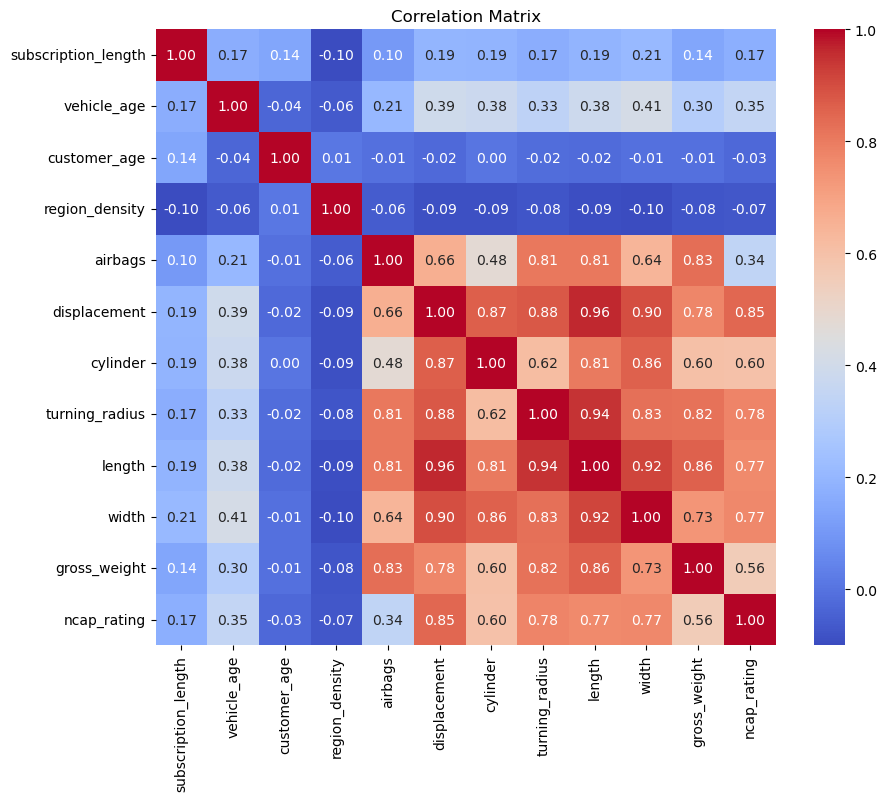

Highly Correlated Features (Threshold > 0.8):
         Feature 1       Feature 2  Correlation
0          airbags  turning_radius     0.810820
1          airbags          length     0.809094
2          airbags    gross_weight     0.828988
3     displacement        cylinder     0.866231
4     displacement  turning_radius     0.875407
5     displacement          length     0.961655
6     displacement           width     0.899302
7     displacement     ncap_rating     0.847065
8         cylinder    displacement     0.866231
9         cylinder          length     0.805476
10        cylinder           width     0.862430
11  turning_radius         airbags     0.810820
12  turning_radius    displacement     0.875407
13  turning_radius          length     0.944899
14  turning_radius           width     0.825603
15  turning_radius    gross_weight     0.823097
16          length         airbags     0.809094
17          length    displacement     0.961655
18          length        cylinder     0.8

In [63]:
# Check for multicollinearity
correlation_matrix = parameter.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

threshold = 0.8  # above this no is high-multicollinearity risk
multicol_pairs = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1.0)].stack().reset_index()
multicol_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("Highly Correlated Features (Threshold > 0.8):")
print(multicol_pairs)

Since there is some correlation between parameter, we will feature-engineered the parameter 
1. Consolidate Size-Related Features : Turning_radius, length, width, gross_weight into vehicle_size  
   [Vehicle_Size] = [length]*[width]*[gross_weight]  
2. Drop [cylinder] and retain [displacement]  
3. Keep [turning_radius, ncap_rating, airbags] as is

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

data_new = data_copy
data_new['vehicle_size'] = data_copy['length'] * data_copy['width'] * data_copy['gross_weight']
data_new = data_new.drop(columns=['length', 'width', 'gross_weight', 'cylinder'])

In [66]:
X = data_new.drop(columns=['claim_status'])
y = data_new['claim_status']

# Apply StandardScaler to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Create unscaled versions of training and test sets for future analysis
X_train, X_test, y_train, y_testd = train_test_split(X, y, test_size=0.3, random_state=42)


## **Step 1: Feature Selection, Downsampling-Upsampling, SMOTE & SMOTE-ENN**

### A. Feature-Selection

In [69]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier

k = 20 

selector = SelectKBest(score_func=f_classif, k=k)
X_train_FS = selector.fit_transform(X_train_scaled, y_train)
X_test_FS = selector.transform(X_test_scaled)

selected_features = X_train.columns[selector.get_support()]

print("Selected Features:", selected_features)
print("Shape of X_train after feature selection:", X_train_FS.shape)
print("Shape of X_test after feature selection:", X_test_FS.shape)

Selected Features: Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_code',
       'region_density', 'model', 'fuel_type', 'max_torque', 'max_power',
       'is_adjustable_steering', 'is_parking_sensors', 'displacement',
       'steering_type', 'is_front_fog_lights', 'is_brake_assist',
       'is_power_steering', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'],
      dtype='object')
Shape of X_train after feature selection: (41014, 20)
Shape of X_test after feature selection: (17578, 20)


### B. Downsampling and Upweighting

In [71]:
from sklearn.utils import resample

x_majority = X_train_scaled[y_train == 0]
x_minority = X_train_scaled[y_train == 1]
y_majority = y_train[y_train == 0]
y_minority = y_train[y_train == 1]

X_majority_downsampled, y_majority_downsampled = resample(
    x_majority, y_majority, replace=False,  
    n_samples=len(x_minority),  
    random_state=42 
)

X_train_DU = pd.concat([X_majority_downsampled, x_minority])
y_train_DU = pd.concat([y_majority_downsampled, y_minority])

class_weight_DU = {0: len(x_majority) / len(x_minority), 1: 1} # assign more weight to downsampled class

print("Shapes of downsampled data:", X_train_DU.shape, y_train_DU.shape)
print("Class weights:", class_weight_DU)

Shapes of downsampled data: (5208, 36) (5208,)
Class weights: {0: 14.750384024577572, 1: 1}


### C. SMOTE

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
X_train_smote_unscaled, y_train_smote_unscaled = smote.fit_resample(X_train, y_train)

### D. Testing

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(max_iter=3000, random_state=42)

# fine-tune the ideal class_weight
param_grid = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 20)],
}

def grid_search_tuning(X_train, y_train, model, param_grid):
    print("\nStarting GridSearchCV for hyperparameter tuning...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print("GridSearchCV completed.")
    print("Best Parameters:", grid_search.best_params_)
    print("Best F1-Score:", grid_search.best_score_)
    return grid_search.best_estimator_

def performance_measure(X_test, y_test, model, method_name):

    print(f"\nEvaluating model with {method_name}...")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Classification Report ({method_name}):")
    print(classification_report(y_test, y_pred, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {roc_auc_score(y_test, y_proba)}")

In [86]:
#Performance using no data-level approach
best_model_no_data = grid_search_tuning(X_train_scaled, y_train, log_reg, param_grid)
performance_measure(X_test_scaled, y_test, best_model_no_data, "No Data-Level Approach")

# Performance using Feature Selection
best_model_fs = grid_search_tuning(X_train_FS, y_train, log_reg, param_grid)
performance_measure(X_test_FS, y_test, best_model_fs, "Feature-Selection Approach")

# Performance Measure using Downsampling-Upweighting
best_model_DU = grid_search_tuning(X_train_DU, y_train_DU, log_reg, param_grid)
performance_measure(X_test_scaled, y_test, best_model_DU, "Downsampling-Upweighting Approach")

# Performance using SMOTE
best_model_smote = grid_search_tuning(X_train_smote, y_train_smote, log_reg, param_grid)
performance_measure(X_test_scaled, y_test, best_model_smote, "SMOTE Approach")


Starting GridSearchCV for hyperparameter tuning...
Fitting 5 folds for each of 19 candidates, totalling 95 fits
GridSearchCV completed.
Best Parameters: {'class_weight': {0: 1, 1: 12}}
Best F1-Score: 0.14793965427724368

Evaluating model with No Data-Level Approach...
Classification Report (No Data-Level Approach):
              precision    recall  f1-score   support

    No Claim       0.95      0.72      0.82     16434
       Claim       0.09      0.40      0.15      1144

    accuracy                           0.70     17578
   macro avg       0.52      0.56      0.48     17578
weighted avg       0.89      0.70      0.77     17578

AUC-ROC Score (No Data-Level Approach): 0.6002391904979528

Starting GridSearchCV for hyperparameter tuning...
Fitting 5 folds for each of 19 candidates, totalling 95 fits
GridSearchCV completed.
Best Parameters: {'class_weight': {0: 1, 1: 12}}
Best F1-Score: 0.14842456838385712

Evaluating model with Feature-Selection Approach...
Classification Report 

## **Comments & Observations**

____________________
### 1. Baseline Logistic Regression
* Performance:
  * High precision (0.95) for No Claim, but Claim precision (0.09) and recall (0.4) are poor.
  * AUC-ROC: 0.60, indicating limited ability to distinguish between classes.
* Conclusion: The baseline highlights the challenges of severe class imbalance, showing a poor performance.
________________________________

### 2. Feature Selection
* Performance:
  * Minimal impact on metrics compared to the baseline.
  * AUC-ROC: 0.6005, showing no meaningful improvement.
* Conclusion: Feature selection does not enhance model performance and will not be pursued further.
_______
### 3. Downsampling-Upweighting
* Performance:
  * Model heavily favors No Claim, resulting in:Poor precision for Claim: 0.07 and low overall accuracy: 0.14.
  * Excessive data loss compromises performance.
* Conclusion: This approach sacrifices valuable data without notable gains and will be discontinued.
__________
### 4. SMOTE
* Performance:
  * Significant improvement in recall for Claim: 0.95. However, precision remains low: 0.07, leading to suboptimal overall results.
  * AUC-ROC: 0.60, unchanged from the baseline.
* Conclusion: SMOTE shows potential for boosting recall but falls short in precision and overall model performance.
_______________
## **Overall Observations**
* Logistic regression struggles significantly with the severe class imbalance in the dataset
* Data-level approaches alone are insufficient to overcome this imbalance effectively
* Feature Selection and Downsampling-Upweighting adds no value to the model and would be discarded in future approach

## **Step 2 : Algorithm-Level Approach and Step 3: Performance Measure**

### A. Balanced Random Forest

In [89]:
import numpy as np
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, f1_score, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [200, 300, 500, 1000],
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [5, 10,15],
    'min_samples_leaf': [2, 4, 6],
    'sampling_strategy': ['all', 0.8, 0.6],
}
param_grid_smote = {
    'n_estimators': [200, 300, 500, 1000],
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [5, 10,15],
    'min_samples_leaf': [2, 4, 6]
}
f1_scorer = make_scorer(f1_score, average='weighted')
                        
def performance_brf(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating Balanced Random Forest with {method_name}...")

    param_grid_selected = param_grid_smote if smote else param_grid
    brf = BalancedRandomForestClassifier(random_state=42)
    
    grid_search = RandomizedSearchCV(
        estimator=brf,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=StratifiedKFold(n_splits=3),
        n_jobs=-1,
        n_iter=50,
        verbose=2
    )
   
    grid_search.fit(X_train, y_train)    
    best_brf = grid_search.best_estimator_
    y_pred = best_brf.predict(X_test)
    y_proba = best_brf.predict_proba(X_test)[:, 1]

     # Evaluate thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    valid_thresholds = (thresholds >= 0.1) & (thresholds <= 0.5) # since our threshold result is quite low, we set a limitation to not use low threshold
    thresholds = thresholds[valid_thresholds]
    precision = precision[:-1][valid_thresholds]
    recall = recall[:-1][valid_thresholds]
    f1_scores = 2 * (precision * recall) / (precision + recall)
    accuracy = (y_pred == y_test).mean()

    # Find the threshold with the best F1-score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\n{method_name} - Best Threshold for F1-Score: {optimal_threshold:.2f}")
    print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")

    # Apply optimal threshold
    y_pred_threshold = (y_proba >= optimal_threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)

    report = classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim'], output_dict=True)
    recall_no_claim = report['No Claim']['recall']

    print(f"\n{method_name} - Classification Report at Optimal Threshold:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")

    return {
        "Method": method_name,
        "Precision": precision[optimal_idx],
        "Recall (claim)": recall[optimal_idx],
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores[optimal_idx],
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [228]:
# Original dataset
brf_ori = performance_brf(X_train, y_train, X_test, y_test, "BRF-Original Dataset")
# SMOTE dataset
brf_smote = performance_brf(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "BRF-SMOTE", smote=True)


Evaluating Balanced Random Forest with BRF-Original Dataset...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(



BRF-Original Dataset - Best Threshold for F1-Score: 0.42
Precision: 0.10, Recall: 0.52, F1-Score: 0.17

BRF-Original Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.68      0.80     16434
       Claim       0.10      0.52      0.17      1144

    accuracy                           0.67     17578
   macro avg       0.53      0.60      0.48     17578
weighted avg       0.90      0.67      0.76     17578

AUC-ROC Score (BRF-Original Dataset): 0.6491197093949012
----------------------------------------------------------

Evaluating Balanced Random Forest with BRF-SMOTE...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(



BRF-SMOTE - Best Threshold for F1-Score: 0.21
Precision: 0.09, Recall: 0.59, F1-Score: 0.15

BRF-SMOTE - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.57      0.72     16434
       Claim       0.09      0.59      0.15      1144

    accuracy                           0.58     17578
   macro avg       0.52      0.58      0.44     17578
weighted avg       0.90      0.58      0.68     17578

AUC-ROC Score (BRF-SMOTE): 0.6019578685583614
----------------------------------------------------------


In [93]:
def performance_brf_2(X_train, y_train, X_test, y_test, method_name, smote=False): #threshold adjusted for Original dataset
    print(f"\nEvaluating Balanced Random Forest with {method_name}...")

    param_grid_selected = param_grid_smote if smote else param_grid
    brf = BalancedRandomForestClassifier(random_state=42)
    
    grid_search = RandomizedSearchCV(
        estimator=brf,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=StratifiedKFold(n_splits=3),
        n_jobs=-1,
        n_iter=50,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_brf = grid_search.best_estimator_
    y_proba = best_brf.predict_proba(X_test)[:, 1]
    threshold = 0.35  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()

    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    recall_no_claim = report['No Claim']['recall']
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc,
    }

In [229]:
# Original dataset
brf_ori_tune = performance_brf_2(X_train, y_train, X_test, y_test, "BRF-Original Dataset(Tuned)")


Evaluating Balanced Random Forest with BRF-Original Dataset(Tuned)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(



BRF-Original Dataset(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.50      0.65     16434
       Claim       0.09      0.73      0.16      1144

    accuracy                           0.51     17578
   macro avg       0.53      0.61      0.41     17578
weighted avg       0.91      0.51      0.62     17578

AUC-ROC Score (BRF-Original Dataset(Tuned)): 0.6491197093949012
----------------------------------------------------------


In [95]:
def performance_brf_3(X_train, y_train, X_test, y_test, method_name, smote=False): #threshold adjusted for smote dataset
    print(f"\nEvaluating Balanced Random Forest with {method_name}...")

    param_grid_selected = param_grid_smote if smote else param_grid
    brf = BalancedRandomForestClassifier(random_state=42)
    
    grid_search = RandomizedSearchCV(
        estimator=brf,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=StratifiedKFold(n_splits=3),
        n_jobs=-1,
        n_iter=50,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_brf = grid_search.best_estimator_
    y_proba = best_brf.predict_proba(X_test)[:, 1]
    threshold = 0.15  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()
    
    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    precision = report['Claim']['precision']
    recall_no_claim = report['No Claim']['recall']
    recall = report['Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")

    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [230]:
# SMOTE dataset
brf_smote_tune = performance_brf_3(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "BRF-SMOTE(Tuned)", smote=True)


Evaluating Balanced Random Forest with BRF-SMOTE(Tuned)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maver\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(



BRF-SMOTE(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.46      0.62     16434
       Claim       0.08      0.70      0.15      1144

    accuracy                           0.47     17578
   macro avg       0.52      0.58      0.38     17578
weighted avg       0.90      0.47      0.59     17578

AUC-ROC Score (BRF-SMOTE(Tuned)): 0.6007429803979639
----------------------------------------------------------


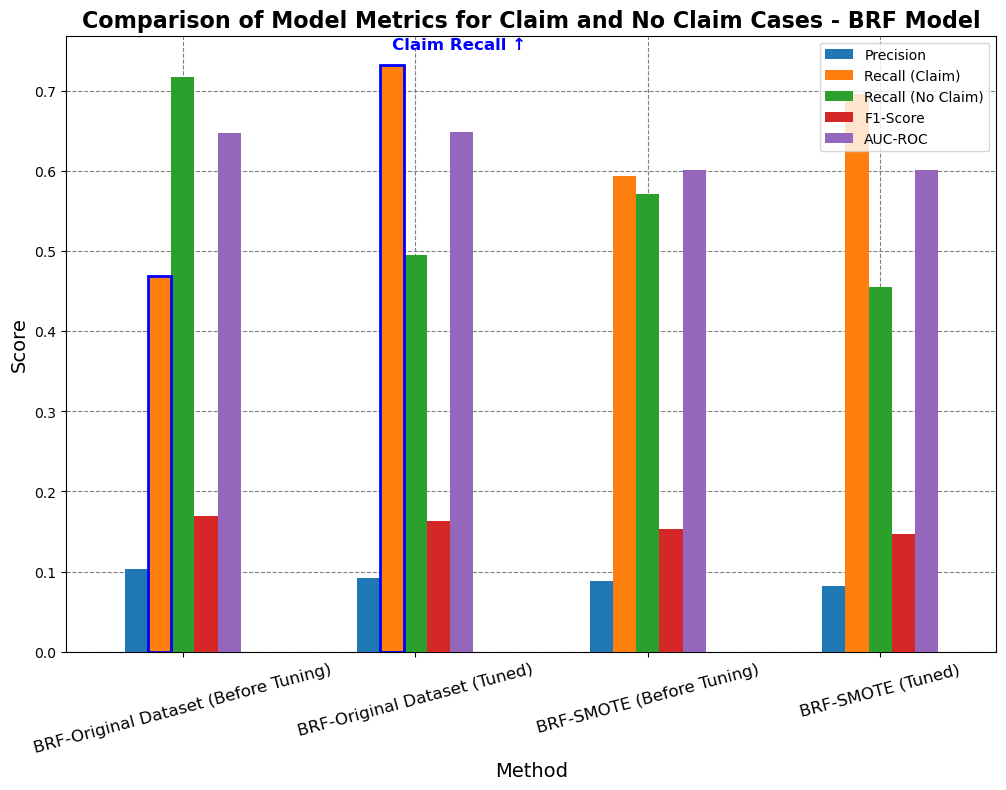

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

metrics = [
    {
        "Method": "BRF-Original Dataset (Before Tuning)",
        "Precision": brf_ori["Precision"],
        "Recall (Claim)": brf_ori["Recall (claim)"],
        "Recall (No Claim)": brf_ori["Recall (no claim)"],
        "F1-Score": brf_ori["F1-Score"],
        "AUC-ROC": brf_ori["AUC-ROC"],
    },
    {
        "Method": "BRF-Original Dataset (Tuned)",
        "Precision": brf_ori_tune["Precision"],
        "Recall (Claim)": brf_ori_tune["Recall (claim)"],
        "Recall (No Claim)": brf_ori_tune["Recall (no claim)"],
        "F1-Score": brf_ori_tune["F1-Score"],
        "AUC-ROC": brf_ori_tune["AUC-ROC"],
    },
    {
        "Method": "BRF-SMOTE (Before Tuning)",
        "Precision": brf_smote["Precision"],
        "Recall (Claim)": brf_smote["Recall (claim)"],
        "Recall (No Claim)": brf_smote["Recall (no claim)"],
        "F1-Score": brf_smote["F1-Score"],
        "AUC-ROC": brf_smote["AUC-ROC"],
    },
    {
        "Method": "BRF-SMOTE (Tuned)",
        "Precision": brf_smote_tune["Precision"],
        "Recall (Claim)": brf_smote_tune["Recall (claim)"],
        "Recall (No Claim)": brf_smote_tune["Recall (no claim)"],
        "F1-Score": brf_smote_tune["F1-Score"],
        "AUC-ROC": brf_smote_tune["AUC-ROC"],
    },
]

df_metrics = pd.DataFrame(metrics).set_index("Method")
fig, ax = plt.subplots(figsize=(12, 8))
bars = df_metrics.plot(kind="bar", ax=ax, grid=True, zorder=3, edgecolor=None)
ax.grid(which="major", linestyle="--", linewidth=0.8, color="gray")

bar_width = 0.1  
bar_positions = [bar.get_x() + 1.5*bar_width for bar in bars.patches] 

# Add rectangles for Claim Recall
claim_before = brf_ori["Recall (claim)"]
claim_after = brf_ori_tune["Recall (claim)"]
rect_before_claim = patches.Rectangle(
    (bar_positions[0] - bar_width / 2, 0), bar_width, claim_before,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)
rect_after_claim = patches.Rectangle(
    (bar_positions[1] - bar_width / 2, 0), bar_width, claim_after,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)

ax.add_patch(rect_before_claim)
ax.add_patch(rect_after_claim)

# Add text labels for Claim Recall and No Claim Recall
ax.text(
    bar_positions[1], claim_after + 0.02,
    "Claim Recall ↑", fontsize=12, color='blue', weight='bold'
)

plt.title("Comparison of Model Metrics for Claim and No Claim Cases - BRF Model", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Method", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.show()


### B. Gradient Boosting Method (XGBoost/LightBoost/Catboost)

#### 1. XGBoost

In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
import numpy as np

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'scale_pos_weight': [14.36, 10, 20],
    'gamma': [0, 1, 5],
    'subsample': [0.8, 1.0]
}

param_grid_xgb_smote = {
    'n_estimators': [200, 300],
    'learning_rate': [0.005, 0.01, 0.05],
    'max_depth': [3, 5],
    'gamma': [1, 3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8],
    'colsample_bytree': [0.7, 0.8],
}

def performance_xgb(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating XGBoost with {method_name}...")

    param_grid_selected = param_grid_xgb_smote if smote else param_grid_xgb
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    grid_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_xgb = grid_search.best_estimator_
    y_proba = best_xgb.predict_proba(X_test)[:, 1]

    # Evaluate thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    valid_thresholds = (thresholds >= 0.1) & (thresholds <= 0.5) # since our threshold result is quite low, we set a limitation to not use low threshold
    thresholds = thresholds[valid_thresholds]
    precision = precision[:-1][valid_thresholds]
    recall = recall[:-1][valid_thresholds]
    f1_scores = 2 * (precision * recall) / (precision + recall)
    
    # Find the threshold with the best F1-score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\n{method_name} - Best Threshold for F1-Score: {optimal_threshold:.2f}")
    print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")

    # Apply optimal threshold
    y_pred_threshold = (y_proba >= optimal_threshold).astype(int)
    accuracy = (y_pred_threshold == y_test).mean()
    auc_roc = roc_auc_score(y_test, y_proba)

    report = classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim'], output_dict=True)
    recall_no_claim = report['No Claim']['recall']

    print(f"\n{method_name} - Classification Report at Optimal Threshold:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")

    return {
        "Method": method_name,
        "Precision": precision[optimal_idx],
        "Recall (claim)": recall[optimal_idx],
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores[optimal_idx],
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [99]:
# Original dataset
xgb_ori = performance_xgb(X_train, y_train, X_test, y_test, "XGB-Original Dataset")
# SMOTE dataset
xgb_smote = performance_xgb(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "XGB-SMOTE", smote=True)


Evaluating XGBoost with XGB-Original Dataset...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:27:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGB-Original Dataset - Best Threshold for F1-Score: 0.46
Precision: 0.11, Recall: 0.40, F1-Score: 0.17

XGB-Original Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.77      0.85     16434
       Claim       0.11      0.40      0.17      1144

    accuracy                           0.75     17578
   macro avg       0.53      0.59      0.51     17578
weighted avg       0.89      0.75      0.81     17578

AUC-ROC Score (XGB-Original Dataset): 0.6441482448122646
----------------------------------------------------------

Evaluating XGBoost with XGB-SMOTE...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGB-SMOTE - Best Threshold for F1-Score: 0.25
Precision: 0.10, Recall: 0.51, F1-Score: 0.17

XGB-SMOTE - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.69      0.80     16434
       Claim       0.10      0.51      0.17      1144

    accuracy                           0.68     17578
   macro avg       0.53      0.60      0.48     17578
weighted avg       0.90      0.68      0.76     17578

AUC-ROC Score (XGB-SMOTE): 0.6396584430538428
----------------------------------------------------------


In [100]:
def performance_xgb_2(X_train, y_train, X_test, y_test, method_name, smote=False): #different threshold adjust for original dataset
    print(f"\nEvaluating XGBoost with {method_name}...")

    param_grid_selected = param_grid_xgb_smote if smote else param_grid_xgb
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    grid_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )

    grid_search.fit(X_train, y_train)
    best_lgbm = grid_search.best_estimator_
    y_proba = best_lgbm.predict_proba(X_test)[:, 1]
    threshold = 0.38  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()

    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [102]:
# Original dataset
xgb_ori_tune = performance_xgb_2(X_train, y_train, X_test, y_test, "XGB-Original Dataset(Tuned)")


Evaluating XGBoost with XGB-Original Dataset(Tuned)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGB-Original Dataset(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.97      0.38      0.55     16434
       Claim       0.08      0.82      0.15      1144

    accuracy                           0.41     17578
   macro avg       0.53      0.60      0.35     17578
weighted avg       0.91      0.41      0.52     17578

AUC-ROC Score (XGB-Original Dataset(Tuned)): 0.6441482448122646
----------------------------------------------------------


In [103]:
def performance_xgb_3(X_train, y_train, X_test, y_test, method_name, smote=False): #different threshold for smote
    print(f"\nEvaluating XGBoost with {method_name}...")

    param_grid_selected = param_grid_xgb_smote if smote else param_grid_xgb
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    grid_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    best_lgbm = grid_search.best_estimator_
    y_proba = best_lgbm.predict_proba(X_test)[:, 1]
    threshold = 0.2  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()

    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [104]:
# SMOTE dataset
xgb_smote_tune = performance_xgb_3(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "XGB-SMOTE(Tuned)", smote=True)


Evaluating XGBoost with XGB-SMOTE(Tuned)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGB-SMOTE(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.52      0.68     16434
       Claim       0.09      0.68      0.16      1144

    accuracy                           0.53     17578
   macro avg       0.52      0.60      0.42     17578
weighted avg       0.90      0.53      0.64     17578

AUC-ROC Score (XGB-SMOTE(Tuned)): 0.6396584430538428
----------------------------------------------------------


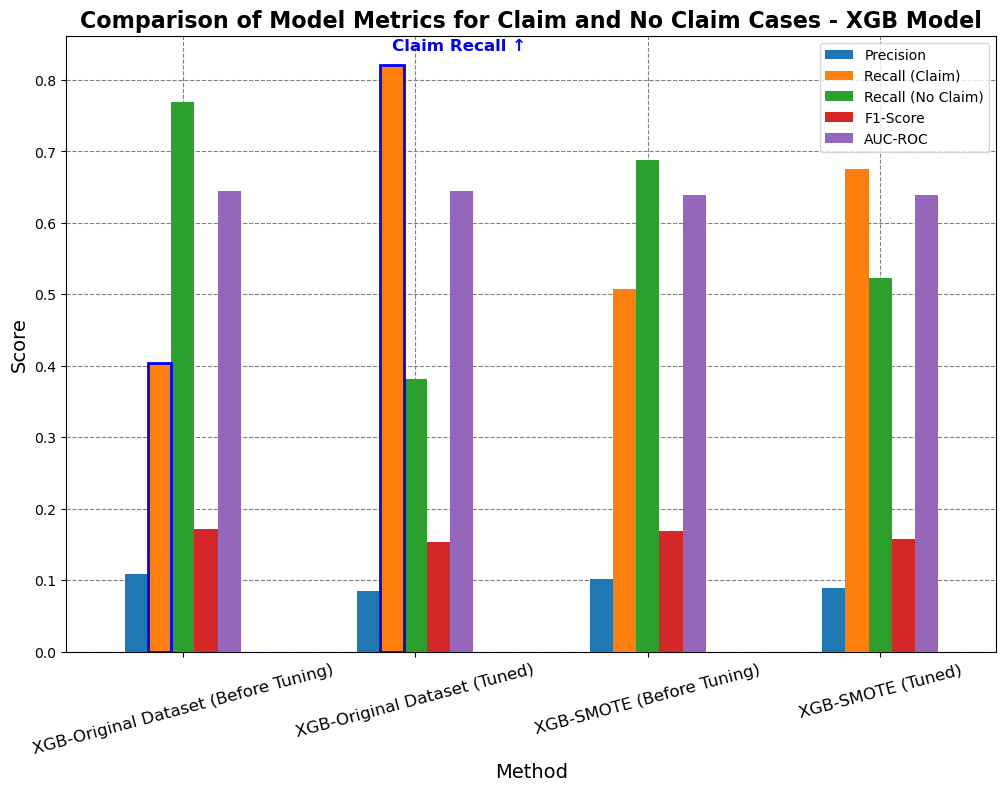

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

metrics = [
    {
        "Method": "XGB-Original Dataset (Before Tuning)",
        "Precision": xgb_ori["Precision"],
        "Recall (Claim)": xgb_ori["Recall (claim)"],
        "Recall (No Claim)": xgb_ori["Recall (no claim)"],
        "F1-Score": xgb_ori["F1-Score"],
        "AUC-ROC": xgb_ori["AUC-ROC"],
    },
    {
        "Method": "XGB-Original Dataset (Tuned)",
        "Precision": xgb_ori_tune["Precision"],
        "Recall (Claim)": xgb_ori_tune["Recall (claim)"],
        "Recall (No Claim)": xgb_ori_tune["Recall (no claim)"],
        "F1-Score": xgb_ori_tune["F1-Score"],
        "AUC-ROC": xgb_ori_tune["AUC-ROC"],
    },
    {
        "Method": "XGB-SMOTE (Before Tuning)",
        "Precision": xgb_smote["Precision"],
        "Recall (Claim)": xgb_smote["Recall (claim)"],
        "Recall (No Claim)": xgb_smote["Recall (no claim)"],
        "F1-Score": xgb_smote["F1-Score"],
        "AUC-ROC": xgb_smote["AUC-ROC"],
    },
    {
        "Method": "XGB-SMOTE (Tuned)",
        "Precision": xgb_smote_tune["Precision"],
        "Recall (Claim)": xgb_smote_tune["Recall (claim)"],
        "Recall (No Claim)": xgb_smote_tune["Recall (no claim)"],
        "F1-Score": xgb_smote_tune["F1-Score"],
        "AUC-ROC": xgb_smote_tune["AUC-ROC"],
    },
]

df_metrics = pd.DataFrame(metrics).set_index("Method")
fig, ax = plt.subplots(figsize=(12, 8))
bars = df_metrics.plot(kind="bar", ax=ax, grid=True, zorder=3, edgecolor=None)
ax.grid(which="major", linestyle="--", linewidth=0.8, color="gray")

bar_width = 0.1  
bar_positions = [bar.get_x() + 1.5*bar_width for bar in bars.patches] 

# Add rectangles for Claim Recall
claim_before = xgb_ori["Recall (claim)"]
claim_after = xgb_ori_tune["Recall (claim)"]
rect_before_claim = patches.Rectangle(
    (bar_positions[0] - bar_width / 2, 0), bar_width, claim_before,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)
rect_after_claim = patches.Rectangle(
    (bar_positions[1] - bar_width / 2, 0), bar_width, claim_after,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)

ax.add_patch(rect_before_claim)
ax.add_patch(rect_after_claim)

# Add text labels for Claim Recall and No Claim Recall
ax.text(
    bar_positions[1], claim_after + 0.02,
    "Claim Recall ↑", fontsize=12, color='blue', weight='bold'
)

plt.title("Comparison of Model Metrics for Claim and No Claim Cases - XGB Model", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Method", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.show()


#### 2. LightBGM

In [106]:
from lightgbm import LGBMClassifier

param_grid_lgbm = {
    'n_estimators': [100, 200, 300],               
    'learning_rate': [0.005, 0.01, 0.1],           
    'max_depth': [5, 10, 15],                     
    'class_weight': [
        {0: 1, 1: 10},                             
        {0: 1, 1: 15},                             
        {0: 1, 1: 20},
    ],
    'min_child_samples': [10, 20, 40],            
    'subsample': [0.6, 0.8, 1.0],                 
    'colsample_bytree': [0.6, 0.8, 1.0],        
    'num_leaves': [31, 63, 127],                 
    'boosting_type': ['gbdt', 'dart'],            
    'lambda_l1': [0, 0.1, 1.0],                   
    'lambda_l2': [0, 0.1, 1.0],                  
    'max_bin': [255, 512]       
}

param_grid_lgbm_smote = {
    'n_estimators': [100, 200, 300],              
    'learning_rate': [0.005, 0.01, 0.1],        
    'max_depth': [5, 10, 15],                    
    'min_child_samples': [10, 20, 40],           
    'subsample': [0.6, 0.8, 1.0],               
    'colsample_bytree': [0.6, 0.8, 1.0],        
    'num_leaves': [31, 63, 127],                 
    'boosting_type': ['gbdt', 'dart'],          
    'lambda_l1': [0, 0.1, 1.0],                
    'lambda_l2': [0, 0.1, 1.0],                
    'max_bin': [255, 512]      
}

def performance_lgbm(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating LightGBM with {method_name}...")
    
    param_grid_selected = param_grid_lgbm_smote if smote else param_grid_lgbm
    lgbm = LGBMClassifier(random_state=42, verbose=-1)
    grid_search =RandomizedSearchCV(
        estimator=lgbm,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_lgbm = grid_search.best_estimator_
    y_proba = best_lgbm.predict_proba(X_test)[:, 1]
    
     # Evaluate thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    valid_thresholds = (thresholds >= 0.1) & (thresholds <= 0.5) # since our threshold result is quite low, we set a limitation to not use low threshold
    thresholds = thresholds[valid_thresholds]
    precision = precision[:-1][valid_thresholds]
    recall = recall[:-1][valid_thresholds]
    f1_scores = 2 * (precision * recall) / (precision + recall)
    
    # Find the threshold with the best F1-score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\n{method_name} - Best Threshold for F1-Score: {optimal_threshold:.2f}")
    print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")

    # Apply optimal threshold
    y_pred_threshold = (y_proba >= optimal_threshold).astype(int)
    accuracy = (y_pred_threshold == y_test).mean()
    auc_roc = roc_auc_score(y_test, y_proba)

    report = classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim'], output_dict=True)
    recall_no_claim = report['No Claim']['recall']

    print(f"\n{method_name} - Classification Report at Optimal Threshold:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision[optimal_idx],
        "Recall (claim)": recall[optimal_idx],
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores[optimal_idx],
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [107]:
# Original dataset
light_ori = performance_lgbm(X_train, y_train, X_test, y_test, "LightGBM-Original Dataset")
# SMOTE dataset
light_smote = performance_lgbm(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "LightGBM-SMOTE", smote=True)


Evaluating LightGBM with LightGBM-Original Dataset...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\maver\AppData\Local\Temp\ipykernel_17532\3663843710.py:60: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)



LightGBM-Original Dataset - Best Threshold for F1-Score: 0.50
Precision: 0.00, Recall: 0.00, F1-Score: nan

LightGBM-Original Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.93      1.00      0.97     16434
       Claim       0.00      0.00      0.00      1144

    accuracy                           0.93     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.87      0.93      0.90     17578

AUC-ROC Score (LightGBM-Original Dataset): 0.6457644787669432
----------------------------------------------------------

Evaluating LightGBM with LightGBM-SMOTE...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

LightGBM-SMOTE - Best Threshold for F1-Score: 0.12
Precision: 0.10, Recall: 0.37, F1-Score: 0.16

LightGBM-SMOTE - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.77      0.85     1

In [181]:
light_ori = performance_lgbm(X_train, y_train, X_test, y_test, "LightGBM-Original Dataset")


Evaluating LightGBM with LightGBM-Original Dataset...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

LightGBM-Original Dataset - Best Threshold for F1-Score: 0.44
Precision: 0.11, Recall: 0.37, F1-Score: 0.17

LightGBM-Original Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.80      0.87     16434
       Claim       0.11      0.37      0.17      1144

    accuracy                           0.77     17578
   macro avg       0.53      0.58      0.52     17578
weighted avg       0.89      0.77      0.82     17578

AUC-ROC Score (LightGBM-Original Dataset): 0.6450771830700637
----------------------------------------------------------


In [120]:
 def performance_lgbm_2(X_train, y_train, X_test, y_test, method_name, smote=False): #different threshold
    print(f"\nEvaluating LightGBM with {method_name}...")

    param_grid_selected = param_grid_lgbm_smote if smote else param_grid_lgbm
    lgbm = LGBMClassifier(random_state=42,verbose=-1)
    grid_search =RandomizedSearchCV(
        estimator=lgbm,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_lgbm = grid_search.best_estimator_
    y_proba = best_lgbm.predict_proba(X_test)[:, 1]


    y_proba = best_lgbm.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    threshold = 0.3  # Adjust threshold based on optimization
    y_pred_threshold = (y_proba >= threshold).astype(int)

    threshold = 0.38  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()

    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }


In [122]:
# Original dataset
light_ori_tune = performance_lgbm_2(X_train, y_train, X_test, y_test, "LightGBM-Original Dataset(Tuned)")


Evaluating LightGBM with LightGBM-Original Dataset(Tuned)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

LightGBM-Original Dataset(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.97      0.37      0.53     16434
       Claim       0.08      0.83      0.15      1144

    accuracy                           0.40     17578
   macro avg       0.53      0.60      0.34     17578
weighted avg       0.91      0.40      0.51     17578

AUC-ROC Score (LightGBM-Original Dataset(Tuned)): 0.652123938645023
----------------------------------------------------------


In [123]:
def performance_lgbm_3(X_train, y_train, X_test, y_test, method_name, smote=False): #different threshold
    print(f"\nEvaluating LightGBM with {method_name}...")

    param_grid_selected = param_grid_lgbm_smote if smote else param_grid_lgbm
    lgbm = LGBMClassifier(random_state=42, verbose=-1)
    grid_search =RandomizedSearchCV(
        estimator=lgbm,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_lgbm = grid_search.best_estimator_
    y_proba = best_lgbm.predict_proba(X_test)[:, 1]
    threshold = 0.05  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()

    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [126]:
# Original dataset
light_smote_tune = performance_lgbm_3(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "LightGBM-SMOTE Dataset(Tuned)", smote=True)


Evaluating LightGBM with LightGBM-SMOTE Dataset(Tuned)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

LightGBM-SMOTE Dataset(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.49      0.65     16434
       Claim       0.08      0.68      0.15      1144

    accuracy                           0.50     17578
   macro avg       0.52      0.58      0.40     17578
weighted avg       0.90      0.50      0.62     17578

AUC-ROC Score (LightGBM-SMOTE Dataset(Tuned)): 0.6129135369620036
----------------------------------------------------------


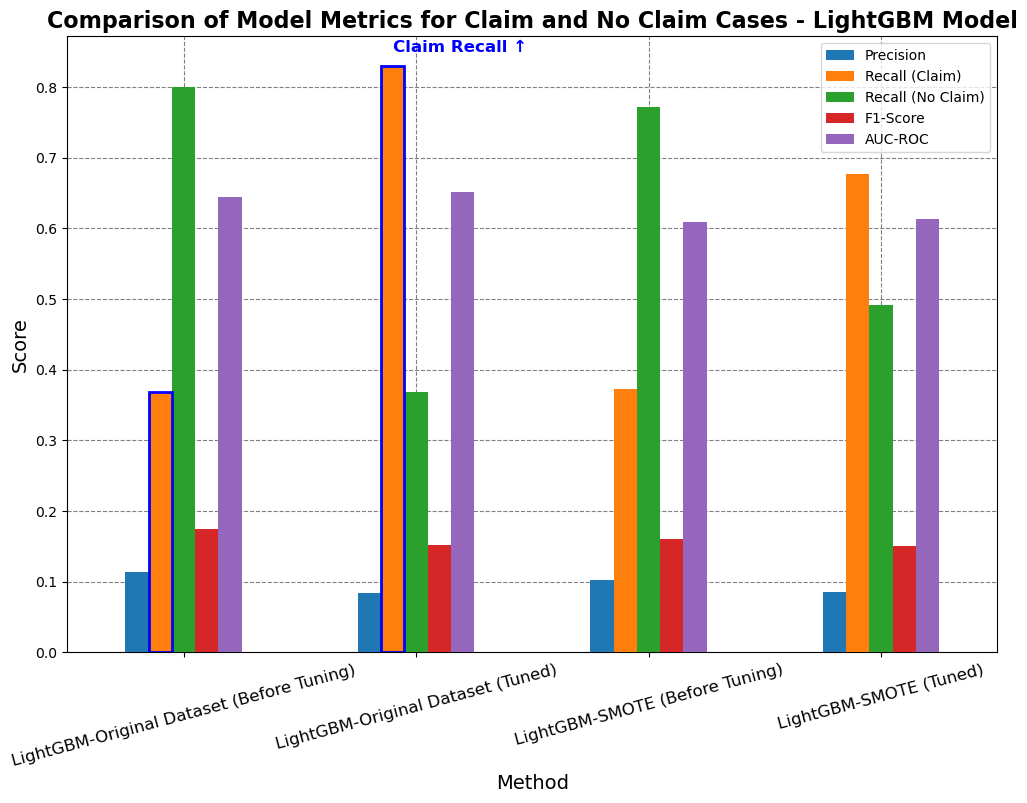

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

metrics = [
    {
        "Method": "LightGBM-Original Dataset (Before Tuning)",
        "Precision": light_ori["Precision"],
        "Recall (Claim)": light_ori["Recall (claim)"],
        "Recall (No Claim)": light_ori["Recall (no claim)"],
        "F1-Score": light_ori["F1-Score"],
        "AUC-ROC": light_ori["AUC-ROC"],
    },
    {
        "Method": "LightGBM-Original Dataset (Tuned)",
        "Precision": light_ori_tune["Precision"],
        "Recall (Claim)": light_ori_tune["Recall (claim)"],
        "Recall (No Claim)": light_ori_tune["Recall (no claim)"],
        "F1-Score": light_ori_tune["F1-Score"],
        "AUC-ROC": light_ori_tune["AUC-ROC"],
    },
    {
        "Method": "LightGBM-SMOTE (Before Tuning)",
        "Precision": light_smote["Precision"],
        "Recall (Claim)": light_smote["Recall (claim)"],
        "Recall (No Claim)": light_smote["Recall (no claim)"],
        "F1-Score": light_smote["F1-Score"],
        "AUC-ROC": light_smote["AUC-ROC"],
    },
    {
        "Method": "LightGBM-SMOTE (Tuned)",
        "Precision": light_smote_tune["Precision"],
        "Recall (Claim)": light_smote_tune["Recall (claim)"],
        "Recall (No Claim)": light_smote_tune["Recall (no claim)"],
        "F1-Score": light_smote_tune["F1-Score"],
        "AUC-ROC": light_smote_tune["AUC-ROC"],
    },
]

df_metrics = pd.DataFrame(metrics).set_index("Method")
fig, ax = plt.subplots(figsize=(12, 8))
bars = df_metrics.plot(kind="bar", ax=ax, grid=True, zorder=3, edgecolor=None)
ax.grid(which="major", linestyle="--", linewidth=0.8, color="gray")

bar_width = 0.1  
bar_positions = [bar.get_x() + 1.5*bar_width for bar in bars.patches] 

# Add rectangles for Claim Recall
claim_before = light_ori["Recall (claim)"]
claim_after = light_ori_tune["Recall (claim)"]
rect_before_claim = patches.Rectangle(
    (bar_positions[0] - bar_width / 2, 0), bar_width, claim_before,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)
rect_after_claim = patches.Rectangle(
    (bar_positions[1] - bar_width / 2, 0), bar_width, claim_after,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)

ax.add_patch(rect_before_claim)
ax.add_patch(rect_after_claim)

# Add text labels for Claim Recall and No Claim Recall
ax.text(
    bar_positions[1], claim_after + 0.02,
    "Claim Recall ↑", fontsize=12, color='blue', weight='bold'
)

plt.title("Comparison of Model Metrics for Claim and No Claim Cases - LightGBM Model", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Method", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.show()

#### 3. CatBoost

In [128]:
from catboost import CatBoostClassifier

param_grid_catboost = {
    'iterations': [300, 500, 700],
    'depth': [7, 9, 12], 
    'learning_rate': [0.01, 0.03, 0.1], 
    'class_weights': [
        [1, 10], [1, 14.36], [1, 20], [1, 25]
    ],
    'l2_leaf_reg': [1, 3, 10],
    'border_count': [128, 256, 512],
    'subsample': [0.6, 0.8],
    'bagging_temperature': [0.0, 0.1, 0.5], 
    'random_strength': [1, 5, 10]
}

param_grid_catboost_smote = {
    'iterations': [300, 500, 700],
    'depth': [7, 9, 12], 
    'learning_rate': [0.01, 0.03, 0.1], 
    'l2_leaf_reg': [1, 3, 10],
    'border_count': [128, 256, 512],  
    'subsample': [0.6, 0.8],
    'bagging_temperature': [0.0, 0.1, 0.5], 
    'random_strength': [1, 5, 10] 
}

def performance_catboost(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating CatBoost with {method_name}...")

    param_grid_selected = param_grid_catboost_smote if smote else param_grid_catboost
    catboost = CatBoostClassifier(random_state=42, verbose=0)
    
    grid_search =RandomizedSearchCV(
        estimator=catboost,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_catboost = grid_search.best_estimator_
    y_proba = best_catboost.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(8, 6))
    plt.hist(y_proba, bins=50, alpha=0.6, label='Predicted Probabilities')
    plt.title(f"Probability Distribution - {method_name}")
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.axvline(0.5, color='red', linestyle='--', label='Threshold 0.5')
    plt.legend()
    plt.show()

    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    valid_thresholds = (thresholds >= 0.1) & (thresholds <= 0.5) # since our threshold result is quite low, we set a limitation to not use low threshold
    thresholds = thresholds[valid_thresholds]
    precision = precision[:-1][valid_thresholds]
    recall = recall[:-1][valid_thresholds]
    f1_scores = 2 * (precision * recall) / (precision + recall)
    
    # Find the threshold with the best F1-score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\n{method_name} - Best Threshold for F1-Score: {optimal_threshold:.2f}")
    print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")

    # Apply optimal threshold
    y_pred_threshold = (y_proba >= optimal_threshold).astype(int)
    accuracy = (y_pred_threshold == y_test).mean()
    auc_roc = roc_auc_score(y_test, y_proba)

    report = classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim'], output_dict=True)
    recall_no_claim = report['No Claim']['recall']

    print(f"\n{method_name} - Classification Report at Optimal Threshold:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision[optimal_idx],
        "Recall (claim)": recall[optimal_idx],
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores[optimal_idx],
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }


Evaluating CatBoost with CatBoost-Original Dataset...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


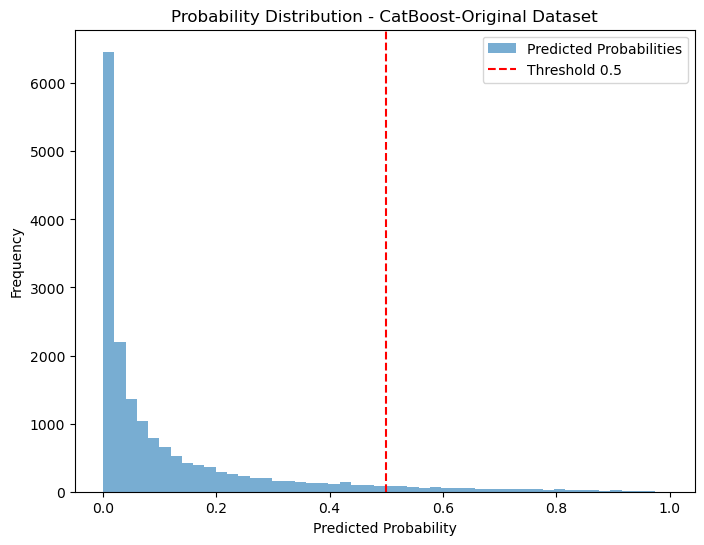


CatBoost-Original Dataset - Best Threshold for F1-Score: 0.10
Precision: 0.08, Recall: 0.42, F1-Score: 0.14

CatBoost-Original Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.94      0.69      0.79     16434
       Claim       0.08      0.42      0.14      1144

    accuracy                           0.67     17578
   macro avg       0.51      0.55      0.47     17578
weighted avg       0.89      0.67      0.75     17578

AUC-ROC Score (CatBoost-Original Dataset): 0.5829903902535337
----------------------------------------------------------

Evaluating CatBoost with CatBoost-SMOTE Dataset...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


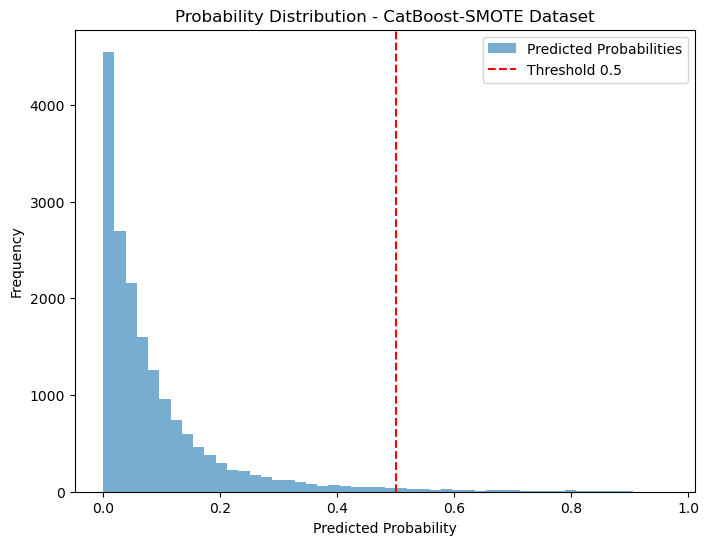


CatBoost-SMOTE Dataset - Best Threshold for F1-Score: 0.11
Precision: 0.09, Recall: 0.38, F1-Score: 0.15

CatBoost-SMOTE Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.74      0.83     16434
       Claim       0.09      0.38      0.15      1144

    accuracy                           0.72     17578
   macro avg       0.52      0.56      0.49     17578
weighted avg       0.89      0.72      0.79     17578

AUC-ROC Score (CatBoost-SMOTE Dataset): 0.5986090207407293
----------------------------------------------------------


In [129]:
# Original dataset
cat_ori = performance_catboost(X_train, y_train, X_test, y_test, "CatBoost-Original Dataset")
# SMOTE dataset
cat_smote = performance_catboost(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "CatBoost-SMOTE Dataset",smote=True)

In [133]:
def performance_catboost_2(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating CatBoost with {method_name}...")

    param_grid_selected = param_grid_catboost_smote if smote else param_grid_catboost
    catboost = CatBoostClassifier(random_state=42, verbose=0)
    
    grid_search =RandomizedSearchCV(
        estimator=catboost,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_cat = grid_search.best_estimator_
    y_proba = best_cat.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(8, 6))
    plt.hist(y_proba, bins=50, alpha=0.6, label='Predicted Probabilities')
    plt.title(f"Probability Distribution - {method_name}")
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.axvline(0.39, color='blue', linestyle='--', label='Threshold 0.39')
    plt.legend()
    plt.show()
    
    threshold = 0.39  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()

    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }


Evaluating CatBoost with CatBoost-Original Dataset(Tuned)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


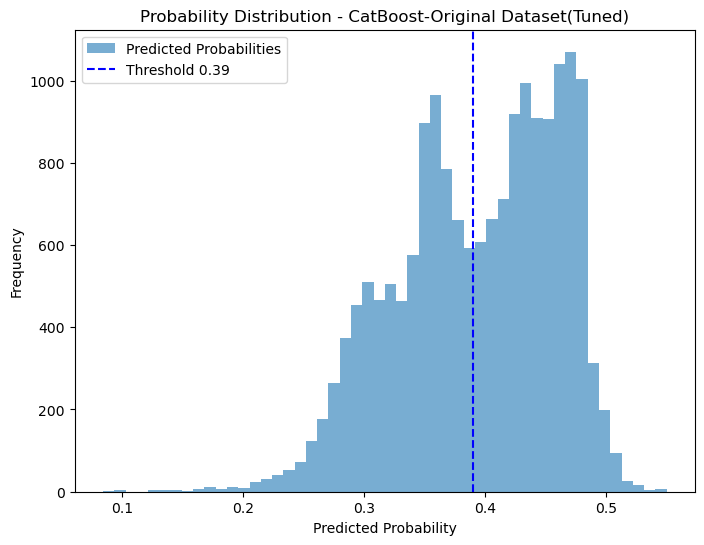


CatBoost-Original Dataset(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.47      0.63     16434
       Claim       0.09      0.75      0.16      1144

    accuracy                           0.49     17578
   macro avg       0.53      0.61      0.40     17578
weighted avg       0.91      0.49      0.60     17578

AUC-ROC Score (CatBoost-Original Dataset(Tuned)): 0.6357114461235491
----------------------------------------------------------


In [134]:
# Original dataset
cat_ori_tune = performance_catboost_2(X_train, y_train, X_test, y_test, "CatBoost-Original Dataset(Tuned)")

In [135]:
def performance_catboost_3(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating CatBoost with {method_name}...")

    param_grid_selected = param_grid_catboost_smote if smote else param_grid_catboost
    catboost = CatBoostClassifier(random_state=42, verbose=0)
    
    grid_search =RandomizedSearchCV(
        estimator=catboost,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=5,
        n_jobs=-1,
        n_iter=100,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    best_cat = grid_search.best_estimator_
    y_proba = best_cat.predict_proba(X_test)[:, 1]
    threshold = 0.03  # Adjust to increase recall
    y_pred_threshold = (y_proba >= threshold).astype(int)
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = (y_pred_threshold == y_test).mean()

    target_names = ['No Claim', 'Claim']
    report = classification_report(y_test, y_pred_threshold, target_names=target_names, output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']
    
    print(f"\n{method_name} - Classification Report:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")
    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [141]:
# SMOTE dataset
cat_smote_tune = performance_catboost_3(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "CatBoost-SMOTE Dataset(Tuned)",smote=True)


Evaluating CatBoost with CatBoost-SMOTE Dataset(Tuned)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

CatBoost-SMOTE Dataset(Tuned) - Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.38      0.55     16434
       Claim       0.08      0.75      0.14      1144

    accuracy                           0.41     17578
   macro avg       0.52      0.57      0.34     17578
weighted avg       0.90      0.41      0.52     17578

AUC-ROC Score (CatBoost-SMOTE Dataset(Tuned)): 0.5969055550449307
----------------------------------------------------------


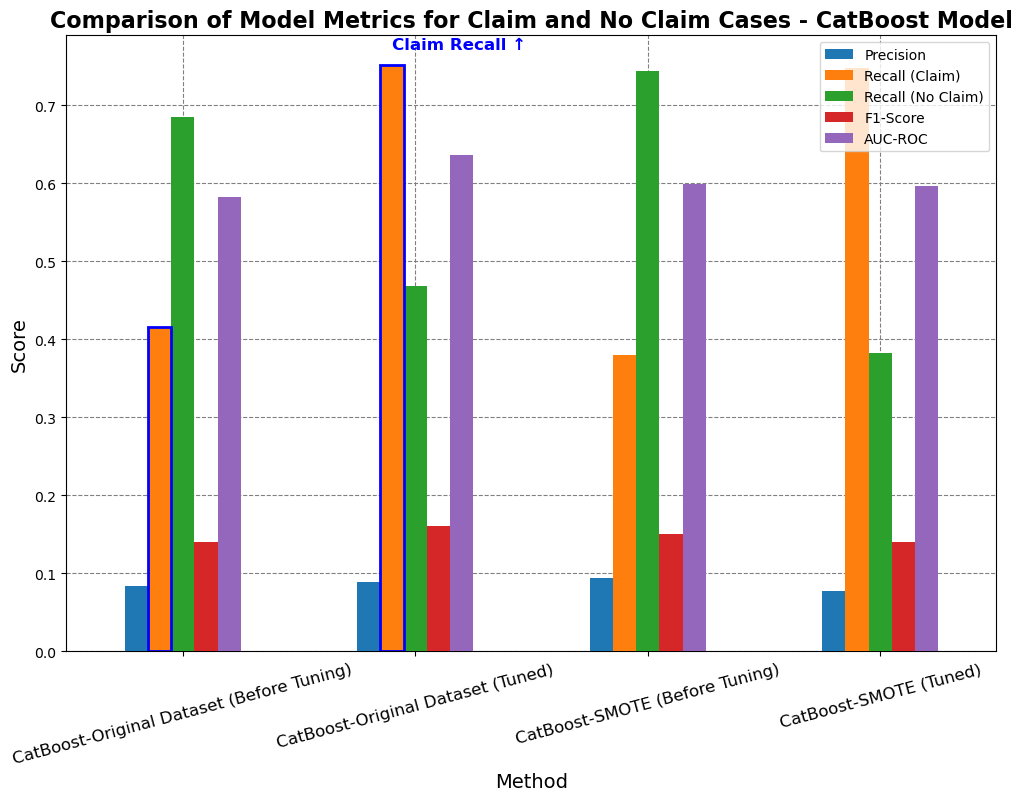

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

metrics = [
    {
        "Method": "CatBoost-Original Dataset (Before Tuning)",
        "Precision": cat_ori["Precision"],
        "Recall (Claim)": cat_ori["Recall (claim)"],
        "Recall (No Claim)": cat_ori["Recall (no claim)"],
        "F1-Score": cat_ori["F1-Score"],
        "AUC-ROC": cat_ori["AUC-ROC"],
    },
    {
        "Method": "CatBoost-Original Dataset (Tuned)",
        "Precision": cat_ori_tune["Precision"],
        "Recall (Claim)": cat_ori_tune["Recall (claim)"],
        "Recall (No Claim)": cat_ori_tune["Recall (no claim)"],
        "F1-Score": cat_ori_tune["F1-Score"],
        "AUC-ROC": cat_ori_tune["AUC-ROC"],
    },
    {
        "Method": "CatBoost-SMOTE (Before Tuning)",
        "Precision": cat_smote["Precision"],
        "Recall (Claim)": cat_smote["Recall (claim)"],
        "Recall (No Claim)": cat_smote["Recall (no claim)"],
        "F1-Score": cat_smote["F1-Score"],
        "AUC-ROC": cat_smote["AUC-ROC"],
    },
    {
        "Method": "CatBoost-SMOTE (Tuned)",
        "Precision": cat_smote_tune["Precision"],
        "Recall (Claim)": cat_smote_tune["Recall (claim)"],
        "Recall (No Claim)": cat_smote_tune["Recall (no claim)"],
        "F1-Score": cat_smote_tune["F1-Score"],
        "AUC-ROC": cat_smote_tune["AUC-ROC"],
    },
]

df_metrics = pd.DataFrame(metrics).set_index("Method")
fig, ax = plt.subplots(figsize=(12, 8))
bars = df_metrics.plot(kind="bar", ax=ax, grid=True, zorder=3, edgecolor=None)
ax.grid(which="major", linestyle="--", linewidth=0.8, color="gray")

bar_width = 0.1  
bar_positions = [bar.get_x() + 1.5*bar_width for bar in bars.patches] 

# Add rectangles for Claim Recall
claim_before = cat_ori["Recall (claim)"]
claim_after = cat_ori_tune["Recall (claim)"]
rect_before_claim = patches.Rectangle(
    (bar_positions[0] - bar_width / 2, 0), bar_width, claim_before,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)
rect_after_claim = patches.Rectangle(
    (bar_positions[1] - bar_width / 2, 0), bar_width, claim_after,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)

ax.add_patch(rect_before_claim)
ax.add_patch(rect_after_claim)

# Add text labels for Claim Recall and No Claim Recall
ax.text(
    bar_positions[1], claim_after + 0.02,
    "Claim Recall ↑", fontsize=12, color='blue', weight='bold'
)

plt.title("Comparison of Model Metrics for Claim and No Claim Cases - CatBoost Model", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Method", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.show()

### C. Stacked Ensemble With/Without Class Weight

Base Models:
- RandomForestClassifier
- GradientBoostingClassifier
- LightGBM  

Meta-Model:
- XGBoost

In [145]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

import numpy as np

param_grid_stacked = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10],
    'rf__class_weight': [{0: 1, 1: 14.36}, {0: 1, 1: 20}],
    'rf__min_samples_split': [2, 10],
    'rf__min_samples_leaf': [1, 5],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.05],
    'gb__max_depth': [3, 5],
    'gb__subsample': [0.6, 0.8],
    'final_estimator__scale_pos_weight': [10, 14.36, 20]
}

param_grid_stacked_smote = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10],
    'rf__class_weight': [{0: 1, 1: 14.36}, {0: 1, 1: 20}],
    'rf__min_samples_split': [2, 10],
    'rf__min_samples_leaf': [1, 5],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.05],
    'gb__max_depth': [3, 5],
    'gb__subsample': [0.6, 0.8],
    'final_estimator__scale_pos_weight': [10, 14.36, 20]
}

def performance_stacked(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating Stacked Ensemble with {method_name}...")

    # Base models
    rf = RandomForestClassifier(random_state=42)
    gb = GradientBoostingClassifier(random_state=42)
    lgb = LGBMClassifier(random_state=42)

    # Meta-Model
    meta_model = XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    )

    # Stacking
    stacking = StackingClassifier(
        estimators=[('rf', rf), ('gb', gb), ('lgb', lgb)],
        final_estimator=meta_model,
        cv=5
    )

    # Parameter Grid Selection
    param_grid_selected = param_grid_stacked_smote if smote else param_grid_stacked

    # RandomizedSearchCV
    grid_search = RandomizedSearchCV(
        estimator=stacking,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=StratifiedKFold(n_splits=3),
        n_jobs=-1,
        n_iter=50,
        verbose=2
    )

    # Fit Model
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("\nBest Parameters:", grid_search.best_params_)

    y_proba = best_model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    valid_thresholds = (thresholds >= 0.1) & (thresholds <= 0.5)
    thresholds = thresholds[valid_thresholds]
    precision = precision[:-1][valid_thresholds]
    recall = recall[:-1][valid_thresholds]
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

    # Find Best Threshold
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    print(f"\n{method_name} - Best Threshold for F1-Score: {optimal_threshold:.2f}")
    print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")

    y_pred_threshold = (y_proba >= optimal_threshold).astype(int)
    accuracy = (y_pred_threshold == y_test).mean()
    auc_roc = roc_auc_score(y_test, y_proba)

    # Classification Report
    report = classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim'], output_dict=True)
    recall_no_claim = report['No Claim']['recall']

    print(f"\n{method_name} - Classification Report at Optimal Threshold:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")

    return {
        "Method": method_name,
        "Precision": precision[optimal_idx],
        "Recall (claim)": recall[optimal_idx],
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores[optimal_idx],
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [147]:
# Original Dataset
stacked_ori = performance_stacked(X_train, y_train, X_test, y_test, "Stacked-Original Dataset")
# SMOTE Dataset
stacked_smote = performance_stacked(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "Stacked-SMOTE Dataset", smote=True)


Evaluating Stacked Ensemble with Stacked-Original Dataset...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 5, 'rf__max_depth': 5, 'rf__class_weight': {0: 1, 1: 20}, 'gb__subsample': 0.6, 'gb__n_estimators': 200, 'gb__max_depth': 3, 'gb__learning_rate': 0.01, 'final_estimator__scale_pos_weight': 10}

Stacked-Original Dataset - Best Threshold for F1-Score: 0.40
Precision: 0.09, Recall: 0.44, F1-Score: 0.15

Stacked-Original Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.95      0.69      0.80     16434
       Claim       0.09      0.44      0.15      1144

    accuracy                           0.67     17578
   macro avg       0.52      0.57      0.47     17578
weighted avg       0.89      0.67      0.76     17578

AUC-ROC Score (Stacked-Original Dataset): 0.6002179144635333
----------------------------------------------------------

Evaluating Stacked Ensemble with Stacked-SMOTE Dataset...
Fitting 3 folds for each

C:\Users\maver\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_depth': 5, 'rf__class_weight': {0: 1, 1: 20}, 'gb__subsample': 0.6, 'gb__n_estimators': 100, 'gb__max_depth': 3, 'gb__learning_rate': 0.01, 'final_estimator__scale_pos_weight': 10}

Stacked-SMOTE Dataset - Best Threshold for F1-Score: 0.50
Precision: 0.10, Recall: 0.32, F1-Score: 0.15

Stacked-SMOTE Dataset - Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

    No Claim       0.94      0.79      0.86     16434
       Claim       0.10      0.32      0.15      1144

    accuracy                           0.76     17578
   macro avg       0.52      0.56      0.50     17578
weighted avg       0.89      0.76      0.81     17578

AUC-ROC Score (Stacked-SMOTE Dataset): 0.581137460415938
----------------------------------------------------------


In [148]:
def performance_stacked_2(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating Stacked Ensemble with {method_name}...")

    # Base models
    rf = RandomForestClassifier(random_state=42)
    gb = GradientBoostingClassifier(random_state=42)
    lgb = LGBMClassifier(random_state=42)

    # Meta-Model
    meta_model = XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    )

    # Stacking
    stacking = StackingClassifier(
        estimators=[('rf', rf), ('gb', gb), ('lgb', lgb)],
        final_estimator=meta_model,
        cv=5
    )

    param_grid_selected = param_grid_stacked_smote if smote else param_grid_stacked

    grid_search = RandomizedSearchCV(
        estimator=stacking,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=StratifiedKFold(n_splits=3),
        n_jobs=-1,
        n_iter=50,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("\nBest Parameters:", grid_search.best_params_)

    threshold=0.30
    y_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred_threshold = (y_proba >= threshold).astype(int)
    accuracy = (y_pred_threshold == y_test).mean()
    auc_roc = roc_auc_score(y_test, y_proba)

    report = classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim'], output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']

    # Output Results
    print(f"\n{method_name} - Classification Report at Threshold {threshold}:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")

    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [149]:
stacked_ori_tune = performance_stacked_2(X_train, y_train, X_test, y_test, "Stacked-Original Dataset(Tuned)")


Evaluating Stacked Ensemble with Stacked-Original Dataset(Tuned)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\maver\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:43:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 5, 'rf__max_depth': 10, 'rf__class_weight': {0: 1, 1: 20}, 'gb__subsample': 0.8, 'gb__n_estimators': 200, 'gb__max_depth': 3, 'gb__learning_rate': 0.01, 'final_estimator__scale_pos_weight': 10}

Stacked-Original Dataset(Tuned) - Classification Report at Threshold 0.3:
              precision    recall  f1-score   support

    No Claim       0.96      0.53      0.68     16434
       Claim       0.09      0.64      0.15      1144

    accuracy                           0.54     17578
   macro avg       0.52      0.59      0.42     17578
weighted avg       0.90      0.54      0.65     17578

AUC-ROC Score (Stacked-Original Dataset(Tuned)): 0.6149508768279305
----------------------------------------------------------


In [150]:
def performance_stacked_3(X_train, y_train, X_test, y_test, method_name, smote=False):
    print(f"\nEvaluating Stacked Ensemble with {method_name}...")

    # Base models
    rf = RandomForestClassifier(random_state=42)
    gb = GradientBoostingClassifier(random_state=42)
    lgb = LGBMClassifier(random_state=42)

    # Meta-Model
    meta_model = XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    )

    # Stacking
    stacking = StackingClassifier(
        estimators=[('rf', rf), ('gb', gb), ('lgb', lgb)],
        final_estimator=meta_model,
        cv=5
    )

    param_grid_selected = param_grid_stacked_smote if smote else param_grid_stacked

    grid_search = RandomizedSearchCV(
        estimator=stacking,
        param_distributions=param_grid_selected,
        scoring=f1_scorer,
        cv=StratifiedKFold(n_splits=3),
        n_jobs=-1,
        n_iter=50,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("\nBest Parameters:", grid_search.best_params_)

    threshold=0.30
    y_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred_threshold = (y_proba >= threshold).astype(int)
    accuracy = (y_pred_threshold == y_test).mean()
    auc_roc = roc_auc_score(y_test, y_proba)

    report = classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim'], output_dict=True)
    precision = report['Claim']['precision']
    recall = report['Claim']['recall']
    recall_no_claim = report['No Claim']['recall']
    f1_scores = report['Claim']['f1-score']

    # Output Results
    print(f"\n{method_name} - Classification Report at Threshold {threshold}:")
    print(classification_report(y_test, y_pred_threshold, target_names=['No Claim', 'Claim']))
    print(f"AUC-ROC Score ({method_name}): {auc_roc}")
    print("----------------------------------------------------------")

    return {
        "Method": method_name,
        "Precision": precision,
        "Recall (claim)": recall,
        "Recall (no claim)": recall_no_claim,
        "F1-Score": f1_scores,
        "Accuracy": accuracy,
        "AUC-ROC": auc_roc
    }

In [151]:
stacked_smote_tune = performance_stacked_3(X_train_smote_unscaled, y_train_smote_unscaled, X_test, y_test, "Stacked-SMOTE Dataset(Tuned)")


Evaluating Stacked Ensemble with Stacked-SMOTE Dataset(Tuned)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\maver\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_depth': 10, 'rf__class_weight': {0: 1, 1: 20}, 'gb__subsample': 0.6, 'gb__n_estimators': 100, 'gb__max_depth': 3, 'gb__learning_rate': 0.01, 'final_estimator__scale_pos_weight': 10}

Stacked-SMOTE Dataset(Tuned) - Classification Report at Threshold 0.3:
              precision    recall  f1-score   support

    No Claim       0.95      0.58      0.72     16434
       Claim       0.08      0.52      0.14      1144

    accuracy                           0.57     17578
   macro avg       0.51      0.55      0.43     17578
weighted avg       0.89      0.57      0.68     17578

AUC-ROC Score (Stacked-SMOTE Dataset(Tuned)): 0.5794023200238971
----------------------------------------------------------


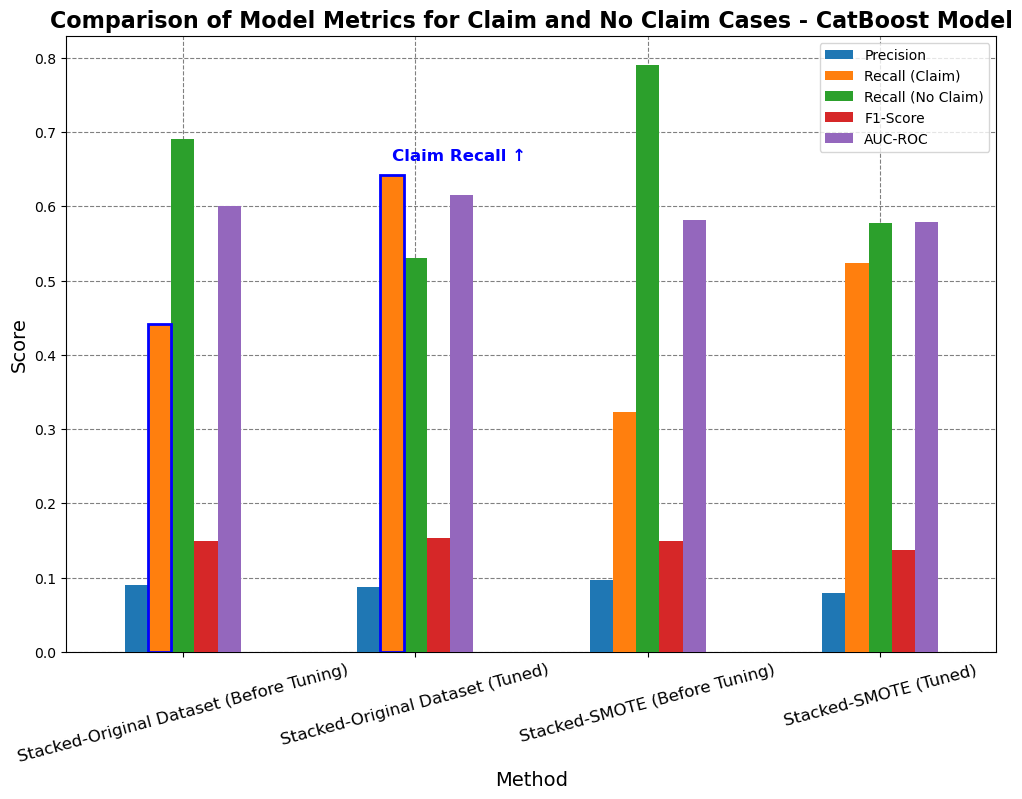

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

metrics = [
    {
        "Method": "Stacked-Original Dataset (Before Tuning)",
        "Precision": stacked_ori["Precision"],
        "Recall (Claim)": stacked_ori["Recall (claim)"],
        "Recall (No Claim)": stacked_ori["Recall (no claim)"],
        "F1-Score": stacked_ori["F1-Score"],
        "AUC-ROC": stacked_ori["AUC-ROC"],
    },
    {
        "Method": "Stacked-Original Dataset (Tuned)",
        "Precision": stacked_ori_tune["Precision"],
        "Recall (Claim)": stacked_ori_tune["Recall (claim)"],
        "Recall (No Claim)": stacked_ori_tune["Recall (no claim)"],
        "F1-Score": stacked_ori_tune["F1-Score"],
        "AUC-ROC": stacked_ori_tune["AUC-ROC"],
    },
    {
        "Method": "Stacked-SMOTE (Before Tuning)",
        "Precision": stacked_smote["Precision"],
        "Recall (Claim)": stacked_smote["Recall (claim)"],
        "Recall (No Claim)": stacked_smote["Recall (no claim)"],
        "F1-Score": stacked_smote["F1-Score"],
        "AUC-ROC": stacked_smote["AUC-ROC"],
    },
    {
        "Method": "Stacked-SMOTE (Tuned)",
        "Precision": stacked_smote_tune["Precision"],
        "Recall (Claim)": stacked_smote_tune["Recall (claim)"],
        "Recall (No Claim)": stacked_smote_tune["Recall (no claim)"],
        "F1-Score": stacked_smote_tune["F1-Score"],
        "AUC-ROC": stacked_smote_tune["AUC-ROC"],
    },
]

df_metrics = pd.DataFrame(metrics).set_index("Method")
fig, ax = plt.subplots(figsize=(12, 8))
bars = df_metrics.plot(kind="bar", ax=ax, grid=True, zorder=3, edgecolor=None)
ax.grid(which="major", linestyle="--", linewidth=0.8, color="gray")

bar_width = 0.1  
bar_positions = [bar.get_x() + 1.5*bar_width for bar in bars.patches] 

# Add rectangles for Claim Recall
claim_before = stacked_ori["Recall (claim)"]
claim_after = stacked_ori_tune["Recall (claim)"]
rect_before_claim = patches.Rectangle(
    (bar_positions[0] - bar_width / 2, 0), bar_width, claim_before,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)
rect_after_claim = patches.Rectangle(
    (bar_positions[1] - bar_width / 2, 0), bar_width, claim_after,
    linewidth=2, edgecolor='blue', facecolor='none', zorder=5
)

ax.add_patch(rect_before_claim)
ax.add_patch(rect_after_claim)

# Add text labels for Claim Recall and No Claim Recall
ax.text(
    bar_positions[1], claim_after + 0.02,
    "Claim Recall ↑", fontsize=12, color='blue', weight='bold'
)

plt.title("Comparison of Model Metrics for Claim and No Claim Cases - CatBoost Model", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Method", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.show()

# Results(3-minute read)

In [278]:
import pandas as pd

# Create DataFrame
results = []
results.append(brf_smote_tune)
results.append(brf_ori_tune)
results.append(brf_ori)
results.append(brf_smote)

results.append(xgb_smote_tune)
results.append(xgb_ori_tune)
results.append(xgb_ori)
results.append(xgb_smote)

results.append(light_smote_tune)
results.append(light_ori_tune)
results.append(light_ori)
results.append(light_smote)

results.append(cat_smote_tune)
results.append(cat_ori_tune)
results.append(cat_ori)
results.append(cat_smote)

results.append(stacked_smote_tune)
results.append(stacked_ori_tune)
results.append(stacked_ori)
results.append(stacked_smote)

results_df = pd.DataFrame(results)
results_df.sort_values(by="F1-Score", ascending=False, inplace=True)
results_df

,Method,Precision,Recall (claim),Recall (no claim),F1-Score,Accuracy,AUC-ROC
10,LightGBM-Original Dataset,0.113815,0.368007,0.800535,0.173859,0.772386,0.645077
6,XGB-Original Dataset,0.108890,0.404720,0.769441,0.171609,0.745705,0.644148
2,BRF-Original Dataset,0.102582,0.517483,0.684861,0.171222,0.823416,0.649120
7,XGB-SMOTE,0.101576,0.506993,0.687842,0.169244,0.676072,0.639658
1,BRF-Original Dataset(Tuned),0.091775,0.732517,0.495375,0.163114,0.510809,0.649120
13,CatBoost-Original Dataset(Tuned),0.089677,0.751748,0.468784,0.160238,0.487200,0.635711
11,LightGBM-SMOTE,0.102007,0.373252,0.771267,0.160225,0.745364,0.609541
4,XGB-SMOTE(Tuned),0.089769,0.675699,0.523062,0.158483,0.532996,0.639658
3,BRF-SMOTE,0.088519,0.594406,0.573932,0.154090,0.833030,0.601958
5,XGB-Original Dataset(Tuned),0.084640,0.820804,0.382074,0.153456,0.410627,0.644148


Finally, the results are in. As mentioned earlier, adjusting thresholds can help boost recall values, but it often comes at the cost of other performance metrics like F1-Score, precision, and accuracy. Looking at the table above, we can see how each model perform and tuning thresholds—lowering them to prioritize recall delivers a mixed outcomes. In general, while these adjustments do improve recall for claims, they also lead to notable drops in several parts.

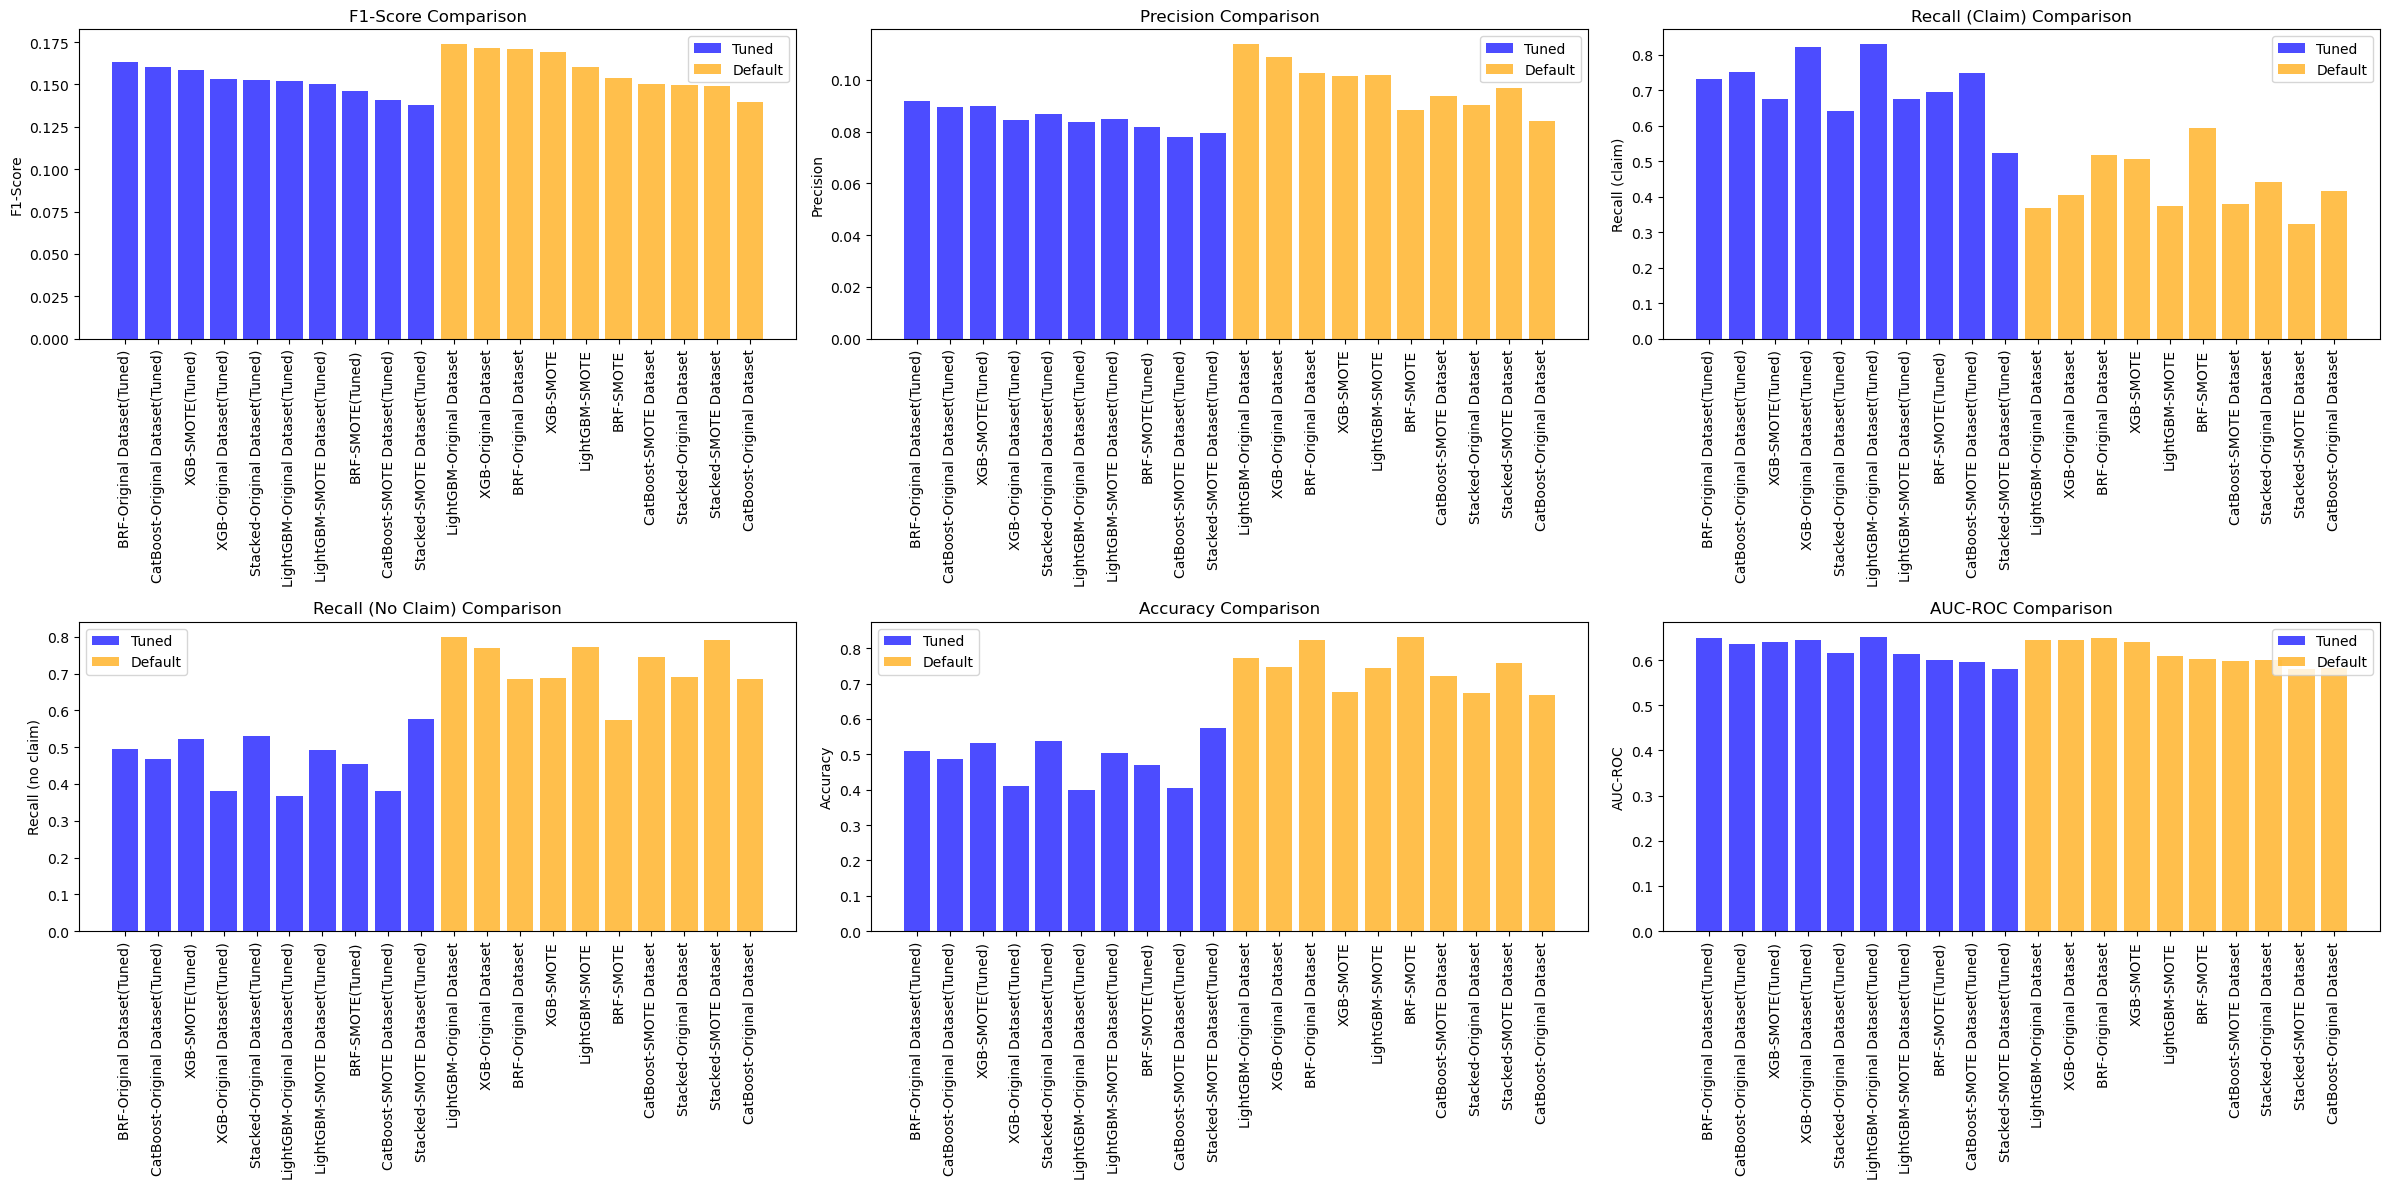

In [302]:
import matplotlib.pyplot as plt

# Separate Tuned and Default (Before Tuning) data
tuned = results_df[results_df['Method'].str.contains('Tuned')]
default = results_df[~results_df['Method'].str.contains('Tuned')]

# Metrics and Titles
metrics = ['F1-Score', 'Precision', 'Recall (claim)', 'Recall (no claim)', 'Accuracy', 'AUC-ROC']
titles = ['F1-Score', 'Precision', 'Recall (Claim)', 'Recall (No Claim)', 'Accuracy', 'AUC-ROC']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(24, 12))  # Adjusted for 6 metrics

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]

    # Plot Tuned vs Default
    ax.bar(tuned['Method'], tuned[metric], label='Tuned', color='blue', alpha=0.7)
    ax.bar(default['Method'], default[metric], label='Default', color='orange', alpha=0.7)

    # Titles and labels
    ax.set_title(f"{titles[i]} Comparison")
    ax.set_ylabel(metric)
    ax.legend()
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


For instance, tuned models like **XGB-Original Dataset (Tuned)** and **CatBoost-Original Dataset (Tuned)** show significant recall improvements for claims (0.8208 and 0.7517, respectively) compared to the original counterparts. However, these gains come with much lower precision (0.0846 and 0.0897) and accuracy scores (0.4106 and 0.4872). 
  <br></br>
Even with oversampling techniques like **SMOTE**, performance gains is limited. Models trained on SMOTE datasets, such as **XGB-SMOTE (Tuned)** and **LightGBM-SMOTE (Tuned)**, struggle to achieve meaningful improvements over their original counterparts. Precision scores hover below 0.10 in many cases, and accuracy does not exceed 0.75 in most models. 
<br></br>
Another observation of this imbalance case is when comparing recall for **claims versus no-claims**. Models tuned for high claim recall often suffer reduced no-claim recall, essentially misclassifying non-claim cases. This could be an issue where failing to filter out legitimate non-claims could lead to unnecessary insurance payouts, leading to increasing costs and unnecessary operational risks.
<br></br>
Overall, at the very least for this dataset despite extensive tuning and SMOTE analysis, threshold adjustments isn't a good solution. Even advanced algorithms-XGBoost, CatBoost, and LightGBM fail to outperform simpler approaches.

## Future Work
While this dataset provided a useful starting point for exploring imbalanced classification, it lacks several critical features needed for robust insurance analysis—such as risk profiles, age, driving frequency, and prior accident history. These missing factors limit the model’s ability to make realistic and actionable predictions.
<br></br>
Model-wise, there’s plenty of room to grow. Recent developments in machine learning methods, as mentioned in the **Reading References** section, offer more robust approaches to handle imbalanced data effectively. Unfortunately, exploring these techniques wasn’t feasible here due to time constraints and limited computing power.
<br></br>

